In [2]:
# Import the EDA packages
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances

# Load the datasets
pd.set_option('display.max_columns', None) # Display Preference


In [3]:
# 2021-2022 SEASON:
df_stats_AS_21_22 = pd.read_csv('player_stats_master_list_all_strengths_2021_2022.csv')
df_stats_ES_21_22 = pd.read_csv('player_stats_master_list_even_strength_2021_2022.csv')
df_stats_PP_21_22 = pd.read_csv('player_stats_master_list_power_play_2021_2022.csv')
df_stats_PK_21_22 = pd.read_csv('player_stats_master_list_penalty_kill_2021_2022.csv')

# 2022-2023 SEASON:
df_stats_AS_22_23 = pd.read_csv('player_stats_master_list_AS_22_23.csv')
df_stats_ES_22_23 = pd.read_csv('player_stats_master_list_ES_22_23.csv')
df_stats_PP_22_23 = pd.read_csv('player_stats_master_list_PP_22_23.csv')
df_stats_PK_22_23 = pd.read_csv('player_stats_master_list_PK_22_23.csv')


# 2023-2024 SEASON - UPDATED FOR LAST 15 GAMES OF THE SEASON
df_stats_AS_23_24 = pd.read_csv('player_stats_master_list_AS_23_24_update.csv')
df_stats_ES_23_24 = pd.read_csv('player_stats_master_list_ES_23_24_update.csv')
df_stats_PP_23_24 = pd.read_csv('player_stats_master_list_PP_23_24_update.csv')
df_stats_PK_23_24 = pd.read_csv('player_stats_master_list_PK_23_24_update.csv')

In [4]:
# NHL Player (Skaters) Stats:
#All Strengths
all_seasons_stats_AS = [df_stats_AS_21_22,
                        df_stats_AS_22_23,
                        df_stats_AS_23_24,]
# Even Strength
all_seasons_stats_ES = [df_stats_ES_21_22,
                        df_stats_ES_22_23,
                        df_stats_ES_23_24,]
# Power Play
all_seasons_stats_PP = [df_stats_PP_21_22,
                        df_stats_PP_22_23,
                        df_stats_PP_23_24,]
# Penalty Kill
all_seasons_stats_PK = [df_stats_PK_21_22,
                        df_stats_PK_22_23,
                        df_stats_PK_23_24,]

#### EDA, Feature Selection and Feature Engineering:

In [5]:
players_21_22 = list(df_stats_AS_21_22['Player'])
print("Num players in 2021-22 season: ", len(players_21_22))

players_22_23 = list(df_stats_AS_22_23['Player'])
print("Num players in 2022-23 season: ", len(players_22_23))

players_23_24 = list(df_stats_AS_23_24['Player'])
print("Num players in 2023-24 season: ", len(players_23_24))


Num players in 2021-22 season:  1006
Num players in 2022-23 season:  950
Num players in 2023-24 season:  911


## Dropping the duplicates of the edge case SEBASTIAN AHO:
#### Two players in the league that have the exact same name 

In [6]:
# Indexes with the edge case of S. Aho Car and NYI to drop
# 2021-2022 Season:
df_stats_AS_21_22.drop([528, 529], axis=0, inplace=True)
df_stats_AS_21_22.reset_index(drop=True, inplace=True)

df_stats_ES_21_22.drop([528, 529], axis=0, inplace=True)
df_stats_ES_21_22.reset_index(drop=True, inplace=True)

df_stats_PP_21_22.drop([499, 500], axis=0, inplace=True)
df_stats_PP_21_22.reset_index(drop=True, inplace=True)

df_stats_PK_21_22.drop([489, 490], axis=0, inplace=True)
df_stats_PP_21_22.reset_index(drop=True, inplace=True)
# AS index 528 & 529 to Drop
# ES index 528 & 529 to Drop
# PP index 499 & 500 to Drop
# PK index 489 & 490 to Drop


In [7]:
# Indexes with the edge case of S. Aho Car and NYI to drop
# 2022-2023 Season:
# AS index 449 & 450 to Drop
# ES index 449 & 450 to Drop
# PP index 425 & 426 to Drop
# PK index 422 & 423 to Drop

df_stats_AS_22_23.drop([449, 450], axis=0, inplace=True)
df_stats_AS_22_23.reset_index(drop=True, inplace=True)

df_stats_ES_22_23.drop([449, 450], axis=0, inplace=True)
df_stats_ES_22_23.reset_index(drop=True, inplace=True)

df_stats_PP_22_23.drop([425, 426], axis=0, inplace=True)
df_stats_PP_22_23.reset_index(drop=True, inplace=True)

df_stats_PK_22_23.drop([422, 423], axis=0, inplace=True)
df_stats_PK_22_23.reset_index(drop=True, inplace=True)


In [8]:
# Indexes with the edge case of S. Aho Car and NYI to drop
# 2023-2024 Season:
# AS index 391 & 392 to Drop
# ES index 391 & 392 to Drop
# PP index 377 & 378 to Drop
# PK index 368 & 369 to Drop

# Dropping the Index: 
df_stats_AS_23_24.drop([391, 392], axis=0, inplace=True)
df_stats_AS_23_24.reset_index(drop=True, inplace=True)

df_stats_ES_23_24.drop([391, 392], axis=0, inplace=True)
df_stats_ES_23_24.reset_index(drop=True, inplace=True)

df_stats_PP_23_24.drop([377, 378], axis=0, inplace=True)
df_stats_PP_23_24.reset_index(drop=True, inplace=True)

df_stats_PK_23_24.drop([368, 369], axis=0, inplace=True)
df_stats_PK_23_24.reset_index(drop=True, inplace=True)

In [9]:
columns_to_drop = ['Height (in)', 'Weight (lbs)']
#2021-22 Season:
df_stats_AS_21_22.drop(columns=columns_to_drop, inplace=True)
df_stats_ES_21_22.drop(columns=columns_to_drop, inplace=True)
df_stats_PP_21_22.drop(columns=columns_to_drop, inplace=True)
df_stats_PK_21_22.drop(columns=columns_to_drop, inplace=True)

#2022-23 Season:
df_stats_AS_22_23.drop(columns=columns_to_drop, inplace=True)
df_stats_ES_22_23.drop(columns=columns_to_drop, inplace=True)
df_stats_PP_22_23.drop(columns=columns_to_drop, inplace=True)
df_stats_PK_22_23.drop(columns=columns_to_drop, inplace=True)

#2023-24 Season:
df_stats_AS_23_24.drop(columns=columns_to_drop, inplace=True)
df_stats_ES_23_24.drop(columns=columns_to_drop, inplace=True)
df_stats_PP_23_24.drop(columns=columns_to_drop, inplace=True)
df_stats_PK_23_24.drop(columns=columns_to_drop, inplace=True)


## BUILDING THE DATAFRAMES FROM WHICH TO RUN THE RECOMMENDATIONS - ALL SEASON COMBINED BY GAME STATE:

In [10]:
# Adding a column so that I can identify which season the stats are coming from when combinig them
#ALL STRENGTHS: 
df_stats_AS_21_22['Season'] = 2022
df_stats_AS_22_23['Season'] = 2023
df_stats_AS_23_24['Season'] = 2024

# EVEN STRENGTH:
df_stats_ES_21_22['Season'] = 2022
df_stats_ES_22_23['Season'] = 2023
df_stats_ES_23_24['Season'] = 2024

# POWER PLAY:
df_stats_PP_21_22['Season'] = 2022
df_stats_PP_22_23['Season'] = 2023
df_stats_PP_23_24['Season'] = 2024

# PENALTY KILL:
df_stats_PK_21_22['Season'] = 2022
df_stats_PK_22_23['Season'] = 2023
df_stats_PK_23_24['Season'] = 2024



In [11]:
# Now I want to concat the dataframes:
#ALL STRENGTHS:
AS_dataframes = [df_stats_AS_21_22, df_stats_AS_22_23, df_stats_AS_23_24]
df_all_stats_AS = pd.concat([df_stats_AS_21_22, df_stats_AS_22_23, df_stats_AS_23_24], ignore_index=True)
df_all_stats_AS 

#EVEN STRENGTH:
ES_dataframes = [df_stats_ES_21_22, df_stats_ES_22_23, df_stats_ES_23_24]
df_all_stats_ES = pd.concat([df_stats_ES_21_22, df_stats_ES_22_23, df_stats_ES_23_24], ignore_index=True)
df_all_stats_ES 

#POWER PLAY:
PP_dataframes = [df_stats_PP_21_22, df_stats_PP_22_23, df_stats_PP_23_24]
df_all_stats_PP = pd.concat([df_stats_PP_21_22, df_stats_PP_22_23, df_stats_PP_23_24], ignore_index=True)
df_all_stats_PP 

#PENALTY KILL:
PK_dataframes = [df_stats_PK_21_22, df_stats_PK_22_23, df_stats_PK_23_24]
df_all_stats_PK = pd.concat([df_stats_PK_21_22, df_stats_PK_22_23, df_stats_PK_23_24], ignore_index=True)
df_all_stats_PK

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season
0,Zdeno Chara,NYI,D,45,72,125.166667,0,0,0,0,0,0.0,2,0.0,0.22,5,5,2,0,0,0,0,0,0,0,0,0,1,2,6,1,8,0,0,0.00,32,178,15.24,29,149,16.29,23,110,17.29,1,7,12.50,1.50,12.86,10.45,13,99,11.61,4,35,10.26,1,2,33.33,9,64,12.33,0,4,0.00,10,83,10.75,0,1,0.0,4.35,93.64,0.980,0,5,57,96,0.00,4,10,89,4.30,1.738426,0.0,0.0,0.0,0.0,0.0,0.96,0.10,2.40,2.40,0.96,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.48,0.96,2.88,0.48,3.83,0.00,0.00,15.34,85.33,13.90,71.42,11.03,52.73,0.48,3.36,0.72,6.16,6.23,47.46,1.92,16.78,0.48,0.96,5.75,40.91,0.00,2.56,6.92,57.47,0.00,0.69,0.00,2.40,27.32,46.02,1.92,4.79,42.66,2022
1,Joe Thornton,FLA,C,43,34,0.500000,0,0,0,0,0,0.0,0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,2,0.00,0,2,0.00,0,1,0.00,0,0,0.00,0.00,0.17,0.00,0,1,0.00,0,0,0.00,0,0,0.00,0,1,0.00,0,0,0.00,0,1,0.00,0,0,0.0,0.00,100.00,1.000,1,0,0,1,100.00,1,0,0,100.00,0.014706,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,240.00,0.00,240.00,0.00,120.00,0.00,0.00,0.00,20.74,0.00,120.00,0.00,0.00,0.00,0.00,0.00,160.00,0.00,0.00,0.00,173.33,0.00,0.00,120.00,0.00,0.00,120.00,120.00,0.00,0.00,2022
2,Jason Spezza,TOR,C,39,71,11.050000,0,0,0,0,0,0.0,0,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,21,38.24,4,19,17.39,3,15,16.67,2,10,16.67,0,2,0.00,0.29,1.59,15.61,2,8,20.00,1,6,14.29,0,2,0.00,1,2,33.33,0,0,0.00,1,14,6.67,0,0,0.0,0.00,80.00,0.800,0,1,33,5,0.00,0,1,34,0.00,0.155634,0.0,0.0,0.0,0.0,0.0,0.00,0.00,5.43,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,5.43,0.00,70.59,114.03,21.72,103.17,16.29,81.45,10.86,54.30,0.00,10.86,1.59,8.62,10.86,43.44,5.43,32.58,0.00,10.86,7.24,14.48,0.00,0.00,7.84,109.80,0.00,0.00,0.00,5.43,179.19,27.15,0.00,5.43,184.62,2022
3,Duncan Keith,EDM,D,39,64,112.550000,0,0,0,0,0,0.0,4,0.0,0.01,4,4,0,0,0,0,0,0,0,0,0,0,4,5,4,1,12,0,0,0.00,29,193,13.06,28,158,15.05,24,122,16.44,3,14,17.65,2.02,14.99,11.87,10,115,8.00,7,42,14.29,0,7,0.00,3,73,3.95,2,3,40.00,7,80,8.05,1,4,20.0,12.50,88.52,1.010,4,9,69,81,5.48,10,15,94,9.62,1.758594,0.0,0.0,0.0,0.0,0.0,2.13,0.00,2.13,2.13,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,2.13,2.67,2.13,0.53,6.40,0.00,0.00,15.46,102.89,14.93,84.23,12.79,65.04,1.60,7.46,1.08,7.99,5.33,61.31,3.73,22.39,0.00,3.73,2.13,51.89,1.42,2.13,5.39,61.60,0.77,3.08,2.13,4.80,36.78,43.18,5.33,8.00,50.11,2022
4,Ryan Suter,DAL,D,37,82,131.283333,0,0,0,0,0,0.0,2,0.0,0.20,4,4,2,0,1,0,6,3,3,0,0,0,4,1,3,0,10,0,0,0.00,40,187,17.62,36,157,18.65,28,123,18.54,5,13,27.78,3.07,12.56,19.64,25,97,20.49,10,35,22.22,3,2,60.00,15,62,19.48,2,7,22.22,10,91,9.90,0,4,0.0,17.86,89.43,1.073,2,9,74,85,2.63,7,15,96,6.80,1.601016,0.0,0.0,0.0,0.0,0.0,0.9

## CLEANING AND STANDARIZING FOR ALL STATS:

In [12]:
# Standardizing the Position Column
# ALL STRENGTHS:
df_all_stats_AS['Position'] = df_all_stats_AS['Position'].str.replace(', ', '')
df_all_stats_AS['Position'].value_counts()

df_all_stats_AS.loc[df_all_stats_AS['Position'] == 'DL', 'Position'] = 'D'
df_all_stats_AS.loc[df_all_stats_AS['Position'] == 'CR', 'Position'] = 'R'
df_all_stats_AS.loc[df_all_stats_AS['Position'] == 'CL', 'Position'] = 'L'
df_all_stats_AS.loc[df_all_stats_AS['Position'] == 'LR', 'Position'] = 'L'
df_all_stats_AS['Position'].value_counts()

# Cleaning the Position column
# EVEN STRENGTH:
df_all_stats_ES['Position'] = df_all_stats_ES['Position'].str.replace(', ', '')
df_all_stats_ES.loc[df_all_stats_ES['Position'] == 'DL', 'Position'] = 'D'
df_all_stats_ES.loc[df_all_stats_ES['Position'] == 'CR', 'Position'] = 'R'
df_all_stats_ES.loc[df_all_stats_ES['Position'] == 'CL', 'Position'] = 'L'
df_all_stats_ES.loc[df_all_stats_ES['Position'] == 'LR', 'Position'] = 'L'


# POWER PLAY:
df_all_stats_PP['Position'] = df_all_stats_PP['Position'].str.replace(', ', '')
df_all_stats_PP.loc[df_all_stats_PP['Position'] == 'DL', 'Position'] = 'D'
df_all_stats_PP.loc[df_all_stats_PP['Position'] == 'CR', 'Position'] = 'R'
df_all_stats_PP.loc[df_all_stats_PP['Position'] == 'CL', 'Position'] = 'L'
df_all_stats_PP.loc[df_all_stats_PP['Position'] == 'LR', 'Position'] = 'L'


# PENALTY KILL:
df_all_stats_PK['Position'] = df_all_stats_PK['Position'].str.replace(', ', '')
df_all_stats_PK.loc[df_all_stats_PK['Position'] == 'DL', 'Position'] = 'D'
df_all_stats_PK.loc[df_all_stats_PK['Position'] == 'CR', 'Position'] = 'R'
df_all_stats_PK.loc[df_all_stats_PK['Position'] == 'CL', 'Position'] = 'L'
df_all_stats_PK.loc[df_all_stats_PK['Position'] == 'LR', 'Position'] = 'L'


In [13]:
# Standardizing the Team Column
# ALL STRENGTHS:
df_all_stats_AS['Team'] = df_all_stats_AS['Team'].str.replace(', ', '')

df_all_stats_AS['Team'] = df_all_stats_AS['Team'].apply(lambda team: team[-3:] if len(team) > 3 else team)
df_all_stats_AS['Team'].value_counts()

#EVEN STRENGTH:
df_all_stats_ES['Team'] = df_all_stats_ES['Team'].str.replace(', ', '')

# If the team name is longer than 3 characters, take the last 3 as the team otherwise (else) keep the team name as is.
# Vectorized approach to modify 'Team' column based on the length of team name
df_all_stats_ES['Team'] = df_all_stats_ES['Team'].apply(lambda team: team[-3:] if len(team) > 3 else team)

#POWER PLAY:
df_all_stats_PP['Team'] = df_all_stats_PP['Team'].str.replace(', ', '')

# If the team name is longer than 3 characters, take the last 3 as the team otherwise (else) keep the team name as is.
# Vectorized approach to modify 'Team' column based on the length of team name
df_all_stats_PP['Team'] = df_all_stats_PP['Team'].apply(lambda team: team[-3:] if len(team) > 3 else team)

#PENALTY KILL:
df_all_stats_PK['Team'] = df_all_stats_PK['Team'].str.replace(', ', '')
# If the team name is longer than 3 characters, take the last 3 as the team otherwise (else) keep the team name as is.
# Vectorized approach to modify 'Team' column based on the length of team name
df_all_stats_PK['Team'] = df_all_stats_PK['Team'].apply(lambda team: team[-3:] if len(team) > 3 else team)

In [14]:
# COLUMN EDITS
# Age Column: Making Age Bins 
# ALL STRENGTHS:
bins = [0, 20, 25, 30, 35, 45]
labels = ['New Pro', 'Young Pro', 'Prime Age', 'Vet', 'Old Vet']
df_all_stats_AS['Age_Group'] = pd.cut(df_all_stats_AS['Age'], bins, labels=labels)
df_all_stats_AS

# EVEN STRENGTH:
df_all_stats_ES['Age_Group'] = pd.cut(df_all_stats_ES['Age'], bins, labels=labels)

# POWER PLAY:
df_all_stats_PP['Age_Group'] = pd.cut(df_all_stats_PP['Age'], bins, labels=labels)

# PENALTY KILL:
df_all_stats_PK['Age_Group'] = pd.cut(df_all_stats_PK['Age'], bins, labels=labels)


#### What I have found is that since I have encoded the age buckets, scaling the data using MinMax scalers offer a much better comparison involving similarly aged players where as StandardScaler does a better job based on the overall stats with less of a consideration for age.

In [15]:
##### Fixing the issue so that IPP can be a valid metric in the comparison, its too important to leave out.
##### IPP is IPP - Individual Point Percentage, the percentage of goals for that player's team while that player is on the ice that the player earned a point on. Total Points/Goals For
df_all_stats_AS.loc[df_all_stats_AS['IPP'] == np.inf, 'IPP'] = 100.0
df_all_stats_ES.loc[df_all_stats_ES['IPP'] == np.inf, 'IPP'] = 100.0
df_all_stats_PP.loc[df_all_stats_PP['IPP'] == np.inf, 'IPP'] = 100.0
df_all_stats_PK.loc[df_all_stats_PK['IPP'] == np.inf, 'IPP'] = 100.0

# NOW I CAN USE THE IPP IN THE COMPARISON!!

In [16]:
df_all_stats_AS.to_csv('NHL_Skater_AS_All_Stats_Clean.csv', index=0)
df_all_stats_ES.to_csv('NHL_Skater_ES_All_Stats_Clean.csv', index=0)
df_all_stats_PP.to_csv('NHL_Skater_PP_All_Stats_Clean.csv', index=0)
df_all_stats_PK.to_csv('NHL_Skater_PK_All_Stats_Clean.csv', index=0)

## ALL STRENGTHS - NHL SKATER RECOMMENDER SYSTEM - VERSION 5 B: ENCODED, DROPPED, STANDARD SCALED, PCA (FIT_TRANSFORMED) - FINAL


In [17]:
# PLAYER TO COMPARE:
df_all_stats_AS.loc[df_all_stats_AS['Player'] == 'Nick Suzuki']

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
749,Nick Suzuki,MTL,C,23,82,1681.833333,21,40,19,21,61,67.78,186,11.29,18.85,309,238,177,69,10,20,30,15,15,0,0,26,71,50,89,99,59,699,711,49.57,1619,1568,50.80,1212,1179,50.69,899,883,50.45,90,106,45.92,83.39,92.01,47.54,808,851,48.70,297,356,45.48,41,64,39.05,511,495,50.80,35,23,60.34,716,615,53.79,12,12,50.0,10.01,88.00,0.980,341,306,279,1052,55.00,669,425,537,55.47,20.510163,0.75,1.43,0.68,0.75,2.18,6.64,0.67,11.02,8.49,6.31,2.46,0.36,0.71,1.07,0.54,0.54,0.00,0.00,0.93,2.53,1.78,3.18,3.53,2.10,24.94,25.37,57.76,55.94,43.24,42.06,32.07,31.50,3.21,3.78,2.97,3.28,28.83,30.36,10.60,12.70,1.46,2.28,24.31,23.55,1.66,1.09,36.90,31.69,0.62,0.62,12.17,10.92,9.95,37.53,23.87,15.16,19.16,2022,Young Pro
1643,Nick Suzuki,MTL,C,24,82,1729.833333,26,40,25,15,66,64.08,162,16.05,17.66,294,217,162,71,12,28,33,11,9,1,1,25,52,42,50,75,49,663,738,47.32,1609,1644,49.46,1181,1208,49.43,851,890,48.88,103,110,48.36,88.24,107.64,45.05,778,892,46.59,306,400,43.34,43,62,40.95,472,492,48.96,39,29,57.35,748,643,53.77,20,12,62.5,12.10,87.64,0.997,347,321,292,889,54.30,690,472,540,56.10,21.095528,0.90,1.39,0.87,0.52,2.29,5.62,0.61,10.20,7.53,5.62,2.46,0.42,0.97,1.14,0.38,0.31,0.03,0.03,0.87,1.80,1.46,1.73,2.60,1.70,23.00,25.60,55.81,57.02,40.96,41.90,29.52,30.87,3.57,3.82,3.06,3.73,26.99,30.94,10.61,13.87,1.49,2.15,21.83,22.75,1.80,1.34,37.48,32.22,1.00,0.60,12.04,11.13,10.13,30.84,23.93,16.37,18.73,2023,Young Pro
2508,Nick Suzuki,MTL,C,25,82,1743.650000,33,44,25,19,77,69.37,186,17.74,22.50,324,266,199,84,13,22,36,16,16,0,0,22,63,41,58,107,48,689,622,52.56,1869,1594,53.97,1391,1160,54.53,973,814,54.45,111,101,52.36,105.96,85.09,55.46,936,814,53.49,359,312,53.50,52,37,58.43,577,502,53.48,35,36,49.30,1177,832,58.59,22,22,50.0,11.41,87.59,0.990,385,348,246,899,61.01,736,481,466,61.23,21.264024,1.14,1.51,0.86,0.65,2.65,6.40,0.77,11.15,9.15,6.85,2.89,0.45,0.76,1.24,0.55,0.55,0.00,0.00,0.76,2.17,1.41,2.00,3.68,1.65,23.71,21.40,64.31,54.85,47.87,39.92,33.48,28.01,3.82,3.48,3.65,2.93,32.21,28.01,12.35,10.74,1.79,1.27,26.47,23.03,1.61,1.65,58.50,41.35,1.09,1.09,13.25,11.97,8.47,30.94,25.33,16.55,16.04,2024,Young Pro


In [18]:
from sklearn.preprocessing import OneHotEncoder
df_all_stats_AS.dtypes

# Get the columns I want to encode:
df_all_stats_AS_dropped_player_team = df_all_stats_AS.drop(columns=['Player', 'Team']) # Would make the df way too complex for not a lot of useful info

categorical_columns = df_all_stats_AS_dropped_player_team.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Apply one-hot encoding to the categorical columns
one_hot_encoded_AS = encoder.fit_transform(df_all_stats_AS_dropped_player_team[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded_AS, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded_all_stats_AS = pd.concat([df_all_stats_AS, one_hot_df], axis=1)
# Drop the original categorical columns
df_encoded_all_stats_AS = df_encoded_all_stats_AS.drop(categorical_columns, axis=1)

In [19]:
drop_columns_AS = ['Player', 'Team', 'GP', 'TOI', 'Shots', 'PIM', 'First Assists', 'First Assists/60', 'Second Assists', 'Second Assists/60',
                   'Faceoffs Won', 'Faceoffs Lost', 'CF', 'CA', 'FF', 'FA', 'CF/60', 'CA/60',
                   'LDCF/60', 'LDCA/60', 'LDGF/60', 'LDGA/60']

In [20]:

# The adjusted Dataframe:
df_all_stats_AS_encoded_dropped = df_encoded_all_stats_AS.drop(columns=drop_columns_AS) #renamed for consistency
original_index_AS = df_all_stats_AS_encoded_dropped.index


# The scaler:

scaler = StandardScaler()

df_all_stats_AS_encoded_dropped_scaled = scaler.fit_transform(df_all_stats_AS_encoded_dropped)

# PCA

pca_AS=PCA()

df_all_stats_AS_encoded_dropped_scaled_pca = pca_AS.fit_transform(df_all_stats_AS_encoded_dropped_scaled)

df_all_stats_AS_encoded_dropped_scaled_pca = pd.DataFrame(df_all_stats_AS_encoded_dropped_scaled_pca,
                                                            index=original_index_AS,)




In [22]:
D_AS=pairwise_distances(df_all_stats_AS_encoded_dropped_scaled_pca, #Things I want to compare
                df_all_stats_AS_encoded_dropped_scaled_pca[df_all_stats_AS_encoded_dropped['Season'] == 2024]) # What to compare it to


# Match the index to from the scaled dataframe:
idx_match_AS = np.argsort(D_AS,axis=1)[:,:6]
# The actual recommender:
df_all_stats_AS[df_all_stats_AS['Season'] == 2024].iloc[idx_match_AS[2508, :], :] # Nick Suzuki


,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
2508,Nick Suzuki,MTL,C,25,82,1743.650000,33,44,25,19,77,69.37,186,17.74,22.50,324,266,199,84,13,22,36,16,16,0,0,22,63,41,58,107,48,689,622,52.56,1869,1594,53.97,1391,1160,54.53,973,814,54.45,111,101,52.36,105.96,85.09,55.46,936,814,53.49,359,312,53.50,52,37,58.43,577,502,53.48,35,36,49.30,1177,832,58.59,22,22,50.00,11.41,87.59,0.990,385,348,246,899,61.01,736,481,466,61.23,21.264024,1.14,1.51,0.86,0.65,2.65,6.40,0.77,11.15,9.15,6.85,2.89,0.45,0.76,1.24,0.55,0.55,0.00,0.00,0.76,2.17,1.41,2.00,3.68,1.65,23.71,21.40,64.31,54.85,47.87,39.92,33.48,28.01,3.82,3.48,3.65,2.93,32.21,28.01,12.35,10.74,1.79,1.27,26.47,23.03,1.61,1.65,58.50,41.35,1.09,1.09,13.25,11.97,8.47,30.94,25.33,16.55,16.04,2024,Young Pro
2510,Robert Thomas,STL,C,25,81,1699.533333,25,60,35,25,85,73.91,168,14.88,22.51,324,241,197,79,8,24,48,20,19,0,1,17,54,69,14,75,46,869,763,53.25,1858,1642,53.09,1376,1255,52.30,950,843,52.98,115,98,53.99,112.27,103.20,52.11,976,811,54.62,378,369,50.60,52,43,54.74,598,442,57.50,44,33,57.14,1160,1007,53.53,13,14,48.15,12.11,88.37,1.005,377,325,357,812,51.36,758,452,649,53.87,20.981893,0.88,2.12,1.24,0.88,3.00,5.93,0.79,11.44,8.51,6.95,2.79,0.28,0.85,1.69,0.71,0.67,0.00,0.04,0.60,1.91,2.44,0.49,2.65,1.62,30.68,26.94,65.59,57.97,48.58,44.31,33.54,29.76,4.06,3.46,3.96,3.64,34.46,28.63,13.34,13.03,1.84,1.52,28.15,20.81,2.07,1.55,59.15,51.35,0.66,0.71,13.31,11.47,12.60,28.67,26.76,15.96,22.91,2024,Young Pro
2733,Tim Stützle,OTT,C,22,75,1583.883333,18,52,19,33,70,70.71,192,9.38,23.50,367,270,217,87,12,39,28,14,14,0,0,40,68,48,87,124,41,239,273,46.68,1935,1402,57.99,1391,1023,57.62,973,758,56.21,99,94,51.30,103.80,74.95,58.07,942,688,57.79,361,282,56.14,42,38,52.50,581,406,58.87,42,30,58.33,1194,756,61.23,14,21,40.00,10.17,87.60,0.978,309,253,170,1103,64.51,655,375,375,63.59,21.118444,0.68,1.97,0.72,1.25,2.65,7.27,0.89,13.90,10.23,8.22,3.30,0.45,1.48,1.06,0.53,0.53,0.00,0.00,1.52,2.58,1.82,3.30,4.70,1.55,9.05,10.34,73.30,53.11,52.69,38.75,36.86,28.71,3.75,3.56,3.93,2.84,35.68,26.06,13.68,10.68,1.59,1.44,29.35,20.51,2.12,1.52,65.33,41.37,0.77,1.15,11.71,9.58,6.44,41.78,24.81,14.21,14.21,2024,Young Pro
2244,Bo Horvat,NYI,C,29,80,1575.283333,33,35,19,16,68,60.71,246,13.41,24.24,422,331,265,98,15,41,39,14,12,1,1,13,44,33,52,58,41,757,642,54.11,1923,1570,55.05,1431,1132,55.83,1020,790,56.35,112,90,55.45,104.24,85.92,54.82,962,748,56.26,392,305,56.24,50,39,56.18,570,443,56.27,39,24,61.90,1230,866,58.68,23,20,53.49,10.98,88.61,0.996,353,241,218,1078,61.82,716,362,452,61.30,19.691042,1.26,1.33,0.72,0.61,2.59,9.37,0.92,16.07,12.61,10.09,3.73,0.57,1.56,1.49,0.53,0.46,0.04,0.04,0.50,1.68,1.26,1.98,2.21,1.56,28.83,24.45,73.24,59.80,54.50,

## EVEN STRENGTH - SKATER RECOMMENDER SYSTEM - VERSION 3: ENCODED CATEGORICAL COLUMNS AND STANDARD SCALED - FINAL

In [23]:
# PLAYER TO COMPARE:
df_all_stats_ES.loc[df_all_stats_ES['Player'] == 'Nick Suzuki']

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
749,Nick Suzuki,MTL,C,23,82,1300.116667,11,26,12,14,37,64.91,128,8.59,11.74,202,164,121,54,9,11,22,11,11,0,0,22,62,44,84,87,48,550,548,50.09,1156,1283,47.40,870,957,47.62,646,713,47.53,57,83,40.71,51.01,71.53,41.63,558,694,44.57,203,287,41.43,24,52,31.58,355,407,46.59,24,17,58.54,515,496,50.94,7,8,46.67,8.82,88.36,0.972,209,270,202,891,50.85,413,377,429,49.05,15.855081,0.51,1.20,0.55,0.65,1.71,5.91,0.54,9.32,7.57,5.58,2.49,0.42,0.51,1.02,0.51,0.51,0.00,0.00,1.02,2.86,2.03,3.88,4.02,2.22,25.38,25.29,53.35,59.21,40.15,44.17,29.81,32.90,2.63,3.83,2.35,3.30,25.75,32.03,9.37,13.24,1.11,2.40,21.84,25.04,1.48,1.05,34.33,33.06,0.47,0.53,9.65,12.46,9.32,41.12,19.06,17.40,19.80,2022,Young Pro
1643,Nick Suzuki,MTL,C,24,82,1316.266667,16,30,18,12,46,63.89,116,13.79,10.70,200,151,109,46,9,15,29,9,7,1,1,20,44,36,45,64,43,517,578,47.21,1179,1335,46.90,863,971,47.06,618,710,46.54,72,87,45.28,55.83,82.25,40.43,543,724,42.86,213,316,40.26,31,51,37.80,330,408,44.72,26,23,53.06,553,523,51.39,14,8,63.64,11.65,87.75,0.994,221,287,182,788,54.84,425,418,391,52.08,16.052033,0.73,1.37,0.82,0.55,2.10,5.29,0.49,9.12,6.88,4.97,2.10,0.41,0.68,1.32,0.41,0.32,0.05,0.05,0.91,2.01,1.64,2.05,2.92,1.96,23.57,26.35,53.74,60.85,39.34,44.26,28.17,32.36,3.28,3.97,2.54,3.75,24.75,33.00,9.71,14.40,1.41,2.32,20.06,24.80,1.58,1.40,36.41,34.44,0.92,0.53,10.07,13.08,8.30,35.92,19.37,19.05,17.82,2023,Young Pro
2508,Nick Suzuki,MTL,C,25,82,1364.183333,20,25,15,10,45,63.38,130,15.38,15.24,240,196,146,63,11,15,30,14,14,0,0,18,52,37,56,92,41,571,543,51.26,1355,1376,49.62,996,991,50.13,688,682,50.22,71,79,47.33,65.67,69.46,48.60,652,700,48.22,253,259,49.41,34,29,53.97,399,441,47.50,22,29,43.14,790,723,52.21,13,16,44.83,10.32,88.42,0.987,249,322,196,797,55.96,446,437,401,52.66,16.636382,0.88,1.10,0.66,0.44,1.98,5.72,0.67,10.56,8.62,6.42,2.77,0.48,0.66,1.32,0.62,0.62,0.00,0.00,0.79,2.29,1.63,2.46,4.05,1.80,25.11,23.88,59.60,60.52,43.81,43.59,30.26,30.00,3.12,3.47,2.89,3.06,28.68,30.79,11.13,11.39,1.50,1.28,23.40,25.86,1.29,1.70,50.19,45.93,0.83,1.02,10.95,14.16,8.62,35.05,19.62,19.22,17.64,2024,Young Pro


In [24]:
from sklearn.preprocessing import OneHotEncoder

# Get the columns I want to encode:
df_all_stats_ES_dropped_player_team = df_all_stats_ES.drop(columns=['Player', 'Team']) # Would make the df way too complex for not a lot of useful info

categorical_columns_ES = df_all_stats_ES_dropped_player_team.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns_ES

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Apply one-hot encoding to the categorical columns
one_hot_encoded_ES = encoder.fit_transform(df_all_stats_ES_dropped_player_team[categorical_columns_ES])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df_ES = pd.DataFrame(one_hot_encoded_ES, columns=encoder.get_feature_names_out(categorical_columns_ES))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded_all_stats_ES = pd.concat([df_all_stats_ES, one_hot_df_ES], axis=1)
# Drop the original categorical columns
df_all_stats_ES_encoded = df_encoded_all_stats_ES.drop(categorical_columns_ES, axis=1)


In [25]:
columns_to_drop_ES = ['Player', 'Age', 'Team', 'GP', 'TOI', 'First Assists', 'First Assists/60', 'Second Assists', 'Second Assists/60', 
                    'CF', 'CA', 'SA', 'SF',
                    'CF/60', 'CA/60','LDCF/60', 'LDCA/60', 'LDGF/60', 'LDGA/60',]

In [26]:
# The adjusted Dataframe:
df_all_stats_ES_encoded_dropped = df_all_stats_ES_encoded.drop(columns=columns_to_drop_ES)
original_index_ES = df_all_stats_ES_encoded_dropped.index

# The scaler:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_all_stats_ES_encoded_dropped_scaled = scaler.fit_transform(df_all_stats_ES_encoded_dropped)

from sklearn.decomposition import PCA

pca_ES=PCA()

df_all_stats_ES_encoded_dropped_scaled_pca = pca_ES.fit_transform(df_all_stats_ES_encoded_dropped_scaled)
df_all_stats_ES_encoded_dropped_scaled_pca = pd.DataFrame(df_all_stats_ES_encoded_dropped_scaled_pca, index=original_index_ES)

In [27]:
from sklearn.metrics.pairwise import pairwise_distances

D_ES=pairwise_distances(df_all_stats_ES_encoded_dropped_scaled_pca, 
                     df_all_stats_ES_encoded_dropped_scaled_pca[df_all_stats_ES_encoded_dropped['Season'] == 2024])


# Match the index to from the scaled dataframe:
idx_match_ES = np.argsort(D_ES,axis=1)[:,:6]

In [28]:
df_all_stats_ES[df_all_stats_ES['Season'] == 2024].iloc[idx_match_ES[2508, :], :]

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
2508,Nick Suzuki,MTL,C,25,82,1364.183333,20,25,15,10,45,63.38,130,15.38,15.24,240,196,146,63,11,15,30,14,14,0,0,18,52,37,56,92,41,571,543,51.26,1355,1376,49.62,996,991,50.13,688,682,50.22,71,79,47.33,65.67,69.46,48.60,652,700,48.22,253,259,49.41,34,29,53.97,399,441,47.50,22,29,43.14,790,723,52.21,13,16,44.83,10.32,88.42,0.987,249,322,196,797,55.96,446,437,401,52.66,16.636382,0.88,1.10,0.66,0.44,1.98,5.72,0.67,10.56,8.62,6.42,2.77,0.48,0.66,1.32,0.62,0.62,0.0,0.00,0.79,2.29,1.63,2.46,4.05,1.80,25.11,23.88,59.60,60.52,43.81,43.59,30.26,30.00,3.12,3.47,2.89,3.06,28.68,30.79,11.13,11.39,1.50,1.28,23.40,25.86,1.29,1.70,50.19,45.93,0.83,1.02,10.95,14.16,8.62,35.05,19.62,19.22,17.64,2024,Young Pro
2510,Robert Thomas,STL,C,25,81,1289.266667,16,39,24,15,55,71.43,109,14.68,15.47,208,159,142,65,6,14,40,16,15,0,1,15,41,56,14,61,42,648,558,53.73,1351,1304,50.89,1008,978,50.76,692,649,51.60,77,66,53.85,74.01,74.30,49.90,674,618,52.17,264,281,48.44,34,27,55.74,410,337,54.89,33,22,60.00,814,780,51.07,4,10,28.57,11.13,89.83,1.010,223,291,226,756,49.67,479,402,451,51.51,15.916872,0.74,1.81,1.12,0.70,2.56,5.07,0.72,9.68,7.40,6.61,3.02,0.28,0.65,1.86,0.74,0.70,0.0,0.05,0.70,1.91,2.61,0.65,2.84,1.95,30.16,25.97,62.87,60.69,46.91,45.51,32.20,30.20,3.58,3.07,3.44,3.46,31.37,28.76,12.29,13.08,1.58,1.26,25.44,20.91,2.05,1.37,54.72,52.43,0.27,0.67,10.38,13.54,10.52,35.18,22.29,18.71,20.99,2024,Young Pro
2349,Dylan Strome,WSH,C,27,82,1227.583333,21,24,17,7,45,76.27,125,16.80,16.20,242,186,158,80,7,24,20,10,10,0,0,10,26,39,11,39,59,529,507,51.06,1314,1267,50.91,928,895,50.91,604,598,50.25,59,68,46.46,65.08,64.44,50.25,653,566,53.57,283,234,54.74,33,30,52.38,370,332,52.71,19,24,44.19,773,655,54.13,7,12,36.84,9.77,88.63,0.984,236,256,120,921,66.29,464,338,265,63.65,14.970528,1.03,1.17,0.83,0.34,2.20,6.11,0.79,11.83,9.09,7.72,3.91,0.34,1.17,0.98,0.49,0.49,0.0,0.00,0.49,1.27,1.91,0.54,1.91,2.88,25.86,24.78,64.22,61.93,45.36,43.74,29.52,29.23,2.88,3.32,3.18,3.15,31.92,27.66,13.83,11.44,1.61,1.47,24.11,21.64,1.24,1.56,54.57,46.24,0.49,0.85,11.53,12.51,5.87,45.02,22.68,16.52,12.95,2024,Prime Age
2497,Casey Mittelstadt,COL,C,26,79,1206.666667,15,32,17,15,47,61.84,103,14.56,10.27,196,137,102,41,5,18,22,11,11,0,0,6,37,43,19,86,29,443,509,46.53,1220,1107,52.43,903,799,53.06,635,540,54.04,76,64,54.29,58.75,58.38,50.16,590,504,53.93,246,218,53.02,30,35,46.15,344,286,54.60,31,17,64.58,742,644,53.54,14,10,58.33,11.97,88.15,1.001,244,244,178,782,57.82,440,335,360,55.00,15.274262,0.75,1.59,0.85,0.75,2.34,5.12,0.51,9.75,6.81,5.07,2.04,0.25,0.90,1.09,0.55,0.55,0.0,0.00,0.30,1.84,2.14,0.94,4.28,1.44,22.03,25.31,60.66,55.04,44.90,39.73,31.57,26.85,3.78,3.18,2.

## POWER PLAY - SKATER RECOMMENDER SYSTEM - VERSION 3: ENCODED CATEGORICAL COLUMNS AND SCALED - FINAL

In [29]:
# PLAYER TO COMPARE:
df_all_stats_PP.loc[df_all_stats_PP['Player'] == 'Nick Suzuki']

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
695,Nick Suzuki,MTL,C,23,82,252.383333,8,12,6,6,20,71.43,43,18.60,5.17,86,56,42,9,0,7,4,2,2,0,0,0,6,3,1,10,3,100,98,50.51,412,67,86.01,300,56,84.27,219,44,83.27,28,7,80.00,29.26,4.53,86.59,223,39,85.11,84,22,79.25,14,5,73.68,139,17,89.10,9,1,90.00,188,17,91.71,5,1,83.33,12.79,84.09,0.969,132,24,0,45,100.00,252,32,5,98.05,3.077846,1.90,2.85,1.43,1.43,4.75,10.22,1.23,20.45,13.31,9.98,2.14,0.00,1.66,0.95,0.48,0.48,0.0,0.0,0.00,1.43,0.71,0.24,2.38,0.71,23.77,23.30,97.95,15.93,71.32,13.31,52.06,10.46,6.66,1.66,6.96,1.08,53.01,9.27,19.97,5.23,3.33,1.19,44.06,5.39,2.85,0.32,64.56,5.84,1.72,0.34,31.38,5.71,0.00,10.70,59.91,7.61,1.19,2022,Young Pro
1510,Nick Suzuki,MTL,C,24,82,275.300000,7,10,7,3,17,60.71,34,20.59,5.89,79,53,42,18,1,11,2,1,1,0,0,2,4,2,2,8,0,91,93,49.46,391,58,87.08,287,54,84.16,207,49,80.86,28,1,96.55,30.52,5.50,84.73,215,27,88.84,84,19,81.55,9,0,100.00,131,8,94.24,13,0,100.00,186,10,94.90,6,0,100.00,13.53,97.96,1.115,124,18,2,15,98.41,260,34,14,94.89,3.357317,1.53,2.18,1.53,0.65,3.71,7.41,1.28,17.22,11.55,9.15,3.92,0.22,2.40,0.44,0.22,0.22,0.0,0.0,0.44,0.87,0.44,0.44,1.74,0.00,19.83,20.27,85.22,12.64,62.55,11.77,45.11,10.68,6.10,0.22,6.65,1.20,46.86,5.88,18.31,4.14,1.96,0.00,38.07,2.32,3.78,0.00,58.55,3.15,1.89,0.00,27.03,3.92,0.44,3.27,56.67,7.41,3.05,2023,Young Pro
2316,Nick Suzuki,MTL,C,25,82,299.666667,13,19,10,9,32,82.05,50,26.00,6.73,76,64,48,18,1,7,6,2,2,0,0,2,9,2,2,14,0,88,59,59.86,490,77,86.42,380,67,85.01,273,56,82.98,39,8,82.98,39.06,5.22,88.22,273,36,88.35,100,19,84.03,17,4,80.95,173,17,91.05,13,3,81.25,375,22,94.46,9,1,90.00,14.29,85.71,1.000,135,19,1,18,99.26,287,35,10,96.63,3.654472,2.60,3.80,2.00,1.80,6.41,10.01,1.35,15.22,12.81,9.61,3.60,0.20,1.40,1.20,0.40,0.40,0.0,0.0,0.40,1.80,0.40,0.40,2.80,0.00,17.62,11.81,98.11,15.42,76.08,13.41,54.66,11.21,7.81,1.60,7.82,1.04,54.66,7.21,20.02,3.80,3.40,0.80,46.18,4.54,3.47,0.80,108.45,6.36,2.60,0.29,27.03,3.80,0.20,3.60,57.46,7.01,2.00,2024,Young Pro


In [30]:

# Get the columns I want to encode:
df_all_stats_PP_dropped_player_team = df_all_stats_PP.drop(columns=['Player', 'Team']) # Would make the df way too complex for not a lot of useful info

categorical_columns_PP = df_all_stats_PP_dropped_player_team.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns_PP

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Apply one-hot encoding to the categorical columns
one_hot_encoded_PP = encoder.fit_transform(df_all_stats_PP_dropped_player_team[categorical_columns_PP])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df_PP = pd.DataFrame(one_hot_encoded_PP, columns=encoder.get_feature_names_out(categorical_columns_PP))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded_all_stats_PP = pd.concat([df_all_stats_PP, one_hot_df_PP], axis=1)
# Drop the original categorical columns
df_all_stats_PP_encoded = df_encoded_all_stats_PP.drop(categorical_columns_PP, axis=1)

In [31]:
drop_columns_PP = ['Player','Team','GP', 'TOI', 'First Assists', 'First Assists/60', 'Second Assists', 'Second Assists/60',
                'PIM', 'Total Penalties', 'Hits', 'Hits Taken', 'Shots Blocked',
                'GA', 'SCF', 'SCA', 'PIM/60', 'Total Penalties/60', 'Hits/60', 'Hits Taken/60', 'Shots Blocked/60', 'GA/60',
                'LDGF/60', 'LDGA/60',]

In [32]:
# The adjusted Dataframe:
#Ammended the Special Teams columns dropped because its more imortant to have the granular scoring chances for comparion since the data doesn't have a lot in the first place for many players

df_all_stats_PP_encoded_dropped = df_all_stats_PP_encoded.drop(columns=drop_columns_PP)
original_index_PP = df_all_stats_PP_encoded_dropped.index

# The scaler:

scaler = StandardScaler()

df_all_stats_PP_encoded_dropped_scaled = scaler.fit_transform(df_all_stats_PP_encoded_dropped)

# PCA

pca_PP=PCA(n_components=60)

df_all_stats_PP_encoded_dropped_scaled_pca = pca_PP.fit_transform(df_all_stats_PP_encoded_dropped_scaled)
df_all_stats_PP_encoded_dropped_scaled_pca = pd.DataFrame(df_all_stats_PP_encoded_dropped_scaled_pca, index=original_index_PP)


In [33]:

D_PP=pairwise_distances(df_all_stats_PP_encoded_dropped_scaled_pca, 
                     df_all_stats_PP_encoded_dropped_scaled_pca[df_all_stats_PP_encoded_dropped['Season'] == 2024])

# Match the index to from the scaled dataframe:
idx_match_PP = np.argsort(D_PP,axis=1)[:,:6]
#The actual PP recommender:
df_all_stats_PP[df_all_stats_PP['Season'] == 2024].iloc[idx_match_PP[2316, :], :]

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
2316,Nick Suzuki,MTL,C,25,82,299.666667,13,19,10,9,32,82.05,50,26.00,6.73,76,64,48,18,1,7,6,2,2,0,0,2,9,2,2,14,0,88,59,59.86,490,77,86.42,380,67,85.01,273,56,82.98,39,8,82.98,39.06,5.22,88.22,273,36,88.35,100,19,84.03,17,4,80.95,173,17,91.05,13,3,81.25,375,22,94.46,9,1,90.0,14.29,85.71,1.000,135,19,1,18,99.26,287,35,10,96.63,3.654472,2.60,3.80,2.00,1.80,6.41,10.01,1.35,15.22,12.81,9.61,3.60,0.20,1.40,1.20,0.40,0.40,0.0,0.0,0.40,1.80,0.40,0.40,2.80,0.00,17.62,11.81,98.11,15.42,76.08,13.41,54.66,11.21,7.81,1.60,7.82,1.04,54.66,7.21,20.02,3.80,3.40,0.80,46.18,4.54,3.47,0.80,108.45,6.36,2.60,0.29,27.03,3.80,0.20,3.60,57.46,7.01,2.00,2024,Young Pro
2318,Robert Thomas,STL,C,25,81,263.633333,8,19,9,10,27,79.41,52,15.38,6.17,107,73,48,11,0,9,6,3,3,0,0,1,11,2,0,10,0,130,104,55.56,478,60,88.85,340,57,85.64,237,45,84.04,34,6,85.00,35.92,6.67,84.35,284,38,88.20,106,16,86.89,16,4,80.00,178,22,89.00,10,1,90.91,341,10,97.15,8,0,100.0,14.35,86.67,1.010,153,19,0,23,100.00,276,32,10,96.50,3.254733,1.82,4.32,2.05,2.28,6.14,11.83,1.40,24.35,16.61,10.92,2.50,0.00,2.05,1.37,0.68,0.68,0.0,0.0,0.23,2.50,0.46,0.00,2.28,0.00,29.59,23.67,108.79,13.66,77.38,12.97,53.94,10.24,7.74,1.37,8.18,1.52,64.64,8.65,24.12,3.64,3.64,0.91,54.01,6.68,3.03,0.30,112.10,3.29,2.63,0.00,34.82,4.32,0.00,5.23,62.81,7.28,2.28,2024,Young Pro
2455,Cole Caufield,MTL,R,23,82,295.816667,9,12,5,7,21,52.50,75,12.00,10.93,130,108,66,22,1,9,2,1,1,0,0,1,7,2,1,10,2,0,0,0.00,487,80,85.89,379,70,84.41,273,59,82.23,40,9,81.63,39.70,5.68,87.49,275,39,87.58,103,22,82.40,18,4,81.82,172,17,91.01,13,4,76.47,369,21,94.62,9,1,90.0,14.65,84.75,0.994,148,18,1,23,99.33,283,35,9,96.92,3.607520,1.83,2.43,1.01,1.42,4.26,15.21,2.22,26.37,21.91,13.39,4.46,0.20,1.83,0.41,0.20,0.20,0.0,0.0,0.20,1.42,0.41,0.20,2.03,0.41,0.00,0.00,98.78,16.23,76.87,14.20,55.37,11.97,8.11,1.83,8.05,1.15,55.78,7.91,20.89,4.46,3.65,0.81,46.52,4.60,3.52,1.08,108.11,6.15,2.64,0.29,30.02,3.65,0.20,4.67,57.40,7.10,1.83,2024,Young Pro
1864,Nazem Kadri,CGY,C,34,81,250.416667,10,12,7,5,22,64.71,59,16.95,11.65,108,85,81,46,1,10,6,3,3,0,0,1,13,3,2,10,1,109,92,54.23,488,70,87.46,353,58,85.89,235,44,84.23,34,6,85.00,40.11,5.50,87.95,276,41,87.07,125,24,83.89,17,3,85.00,151,17,89.88,10,3,76.92,361,20,94.75,7,0,100.0,14.47,86.36,1.008,122,22,0,21,100.00,278,38,8,97.20,3.091564,2.40,2.88,1.68,1.20,5.27,14.14,2.79,25.88,20.37,19.41,11.02,0.24,2.40,1.44,0.72,0.72,0.0,0.0,0.24,3.11,0.72,0.48,2.40,0.24,26.12,22.04,116.93,16.77,84.58,13.90,56.31,10.54,8.15,1.44,9.61,1.32,66.13,9.82,29.95,5.75,4.07,0.72,48.24,5.43,3.19,0.96,124.94,6.92,2.42,0.00,29.23,5.27,0.00,5.03,66.61,9.10,1.92,2024,Vet
2465,Jack Hughes,N.J,C,23,62,236.600000,9,

## PENALTY KILL PLAYER RECOMMENDER - VERSION 2: ENCODED and SCALED - FINAL

In [34]:
# PLAYER TO RECOMMEND
df_all_stats_PK.loc[df_all_stats_PK['Player'] == 'Nick Suzuki']

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
681,Nick Suzuki,MTL,C,23,82,123.333333,1,2,1,1,3,75.0,14,7.14,1.87,20,17,13,5,1,2,4,2,2,0,0,4,3,3,4,2,8,49,65,42.98,50,218,18.66,41,166,19.81,33,126,20.75,4,16,20.00,3.03,15.96,15.97,26,118,18.06,9,47,16.07,2,7,22.22,17,71,19.32,2,5,28.57,13,102,11.30,0,3,0.0,12.12,87.30,0.994,0,12,77,108,0.00,4,16,103,3.74,1.504065,0.49,0.97,0.49,0.49,1.46,6.81,0.91,9.73,8.27,6.32,2.43,0.49,0.97,1.95,0.97,0.97,0.0,0.0,1.95,1.46,1.46,1.95,0.97,3.89,23.84,31.62,24.32,106.05,19.95,80.76,16.05,61.30,1.95,7.78,1.48,7.76,12.65,57.41,4.38,22.86,0.97,3.41,11.03,46.05,1.3,3.24,9.14,71.68,0.0,2.11,0.00,5.84,37.46,52.54,1.95,7.78,50.11,2022,Young Pro
1467,Nick Suzuki,MTL,C,24,82,136.883333,2,0,0,0,2,100.0,11,18.18,1.07,14,12,10,6,2,2,2,1,1,0,0,3,4,4,3,3,6,55,67,45.08,38,251,13.15,30,183,14.08,25,131,16.03,2,22,8.33,1.90,19.89,8.72,19,141,11.88,8,65,10.96,2,11,15.38,11,76,12.64,0,6,0.00,9,110,7.56,0,4,0.0,8.00,83.21,0.912,2,16,108,85,1.82,5,20,135,3.57,1.669309,0.88,0.00,0.00,0.00,0.88,4.82,0.47,6.14,5.26,4.38,2.63,0.88,0.88,0.88,0.44,0.44,0.0,0.0,1.31,1.75,1.75,1.31,1.31,2.63,24.11,29.37,16.66,110.02,13.15,80.21,10.96,57.42,0.88,9.64,0.83,8.72,8.33,61.80,3.51,28.49,0.88,4.82,6.43,44.42,0.0,3.51,5.70,69.65,0.0,2.53,0.88,7.01,47.34,37.26,2.19,8.77,59.17,2023,Young Pro
2224,Nick Suzuki,MTL,C,25,82,79.800000,0,0,0,0,0,0.0,6,0.00,0.54,8,6,5,3,1,0,0,0,0,0,0,2,2,2,0,1,7,30,20,60.00,24,141,14.55,15,102,12.82,12,76,13.64,1,14,6.67,1.24,10.41,10.62,11,78,12.36,6,34,15.00,1,4,20.00,5,44,10.20,0,4,0.00,12,87,12.12,0,5,0.0,8.33,81.58,0.899,1,7,49,84,2.00,3,9,55,5.17,0.973171,0.00,0.00,0.00,0.00,0.00,4.51,0.40,6.02,4.51,3.76,2.26,0.75,0.00,0.00,0.00,0.00,0.0,0.0,1.50,1.50,1.50,0.00,0.75,5.26,22.56,15.04,18.05,106.02,11.28,76.69,9.02,57.14,0.75,10.53,0.93,7.83,8.27,58.65,4.51,25.56,0.75,3.01,5.01,44.11,0.0,4.01,13.03,94.49,0.0,5.43,0.75,5.26,36.84,63.16,2.26,6.77,41.35,2024,Young Pro


In [35]:

# Get the columns I want to encode:
df_all_stats_PK_dropped_player_team = df_all_stats_PK.drop(columns=['Player', 'Team']) # Would make the df way too complex for not a lot of useful info

categorical_columns_PK = df_all_stats_PK_dropped_player_team.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns_PK

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Apply one-hot encoding to the categorical columns
one_hot_encoded_PK = encoder.fit_transform(df_all_stats_PK_dropped_player_team[categorical_columns_PK])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df_PK = pd.DataFrame(one_hot_encoded_PK, columns=encoder.get_feature_names_out(categorical_columns_PK))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded_all_stats_PK = pd.concat([df_all_stats_PK, one_hot_df_PK], axis=1)
# Drop the original categorical columns
df_all_stats_PK_encoded = df_encoded_all_stats_PK.drop(categorical_columns_PK, axis=1)

In [37]:
# The adjusted Dataframe:
# Kept more columns because of the niche game state. Its highly defensive and some of the macro offensive totals aren't as valuable.
#Even the Faceoff and penalty data is very useful when considering the penalty kill. 
drop_columns_PK = ['Player', 'Team', 'GP', 'TOI', 'Shots', 'First Assists', 'First Assists/60', 'Second Assists', 'Second Assists/60',
                   'SH%', 'PIM',
                   'CF', 'CA', 'FF', 'FA', 'SF', 'Shots/60', 'Rebounds Created/60',
                   'PIM/60',]
df_all_stats_PK_encoded_dropped = df_all_stats_PK_encoded.drop(columns=drop_columns_PK)

In [38]:
# The Scaler:

scaler = StandardScaler()

df_all_stats_PK_encoded_dropped_scaled = scaler.fit_transform(df_all_stats_PK_encoded_dropped)

# PCA

pca_PK=PCA(n_components=60)

df_all_stats_PK_encoded_dropped_scaled_pca = pca_PK.fit_transform(df_all_stats_PK_encoded_dropped_scaled)


In [39]:
# The PK Recommmender:

D_PK=pairwise_distances(df_all_stats_PK_encoded_dropped_scaled_pca,
                     df_all_stats_PK_encoded_dropped_scaled_pca[df_all_stats_PK_encoded_dropped['Season'] == 2024])

idx_match_PK = np.argsort(D_PK,axis=1)[:,:6]

df_all_stats_PK[df_all_stats_PK['Season'] == 2024].iloc[idx_match_PK[2224, :], :]

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
2224,Nick Suzuki,MTL,C,25,82,79.800000,0,0,0,0,0,0.0,6,0.0,0.54,8,6,5,3,1,0,0,0,0,0,0,2,2,2,0,1,7,30,20,60.00,24,141,14.55,15,102,12.82,12,76,13.64,1,14,6.67,1.24,10.41,10.62,11,78,12.36,6,34,15.00,1,4,20.00,5,44,10.20,0,4,0.0,12,87,12.12,0,5,0.0,8.33,81.58,0.899,1,7,49,84,2.00,3,9,55,5.17,0.973171,0.00,0.0,0.0,0.0,0.00,4.51,0.40,6.02,4.51,3.76,2.26,0.75,0.00,0.00,0.00,0.00,0.0,0.0,1.50,1.50,1.50,0.00,0.75,5.26,22.56,15.04,18.05,106.02,11.28,76.69,9.02,57.14,0.75,10.53,0.93,7.83,8.27,58.65,4.51,25.56,0.75,3.01,5.01,44.11,0.0,4.01,13.03,94.49,0.0,5.43,0.75,5.26,36.84,63.16,2.26,6.77,41.35,2024,Young Pro
2293,Ty Dellandrea,DAL,C,24,42,79.766667,0,0,0,0,0,0.0,4,0.0,0.53,6,5,6,3,2,1,2,1,1,0,0,1,0,4,1,1,4,32,48,40.00,21,143,12.80,18,116,13.43,13,88,12.87,0,12,0.00,1.46,11.65,11.10,11,83,11.70,6,36,14.29,0,3,0.00,5,47,9.62,0,6,0.0,6,115,4.96,0,3,0.0,0.00,86.36,0.864,1,8,75,43,1.32,2,8,91,2.15,1.899206,0.00,0.0,0.0,0.0,0.00,3.01,0.40,4.51,3.76,4.51,2.26,1.50,0.75,1.50,0.75,0.75,0.0,0.0,0.75,0.00,3.01,0.75,0.75,3.01,24.07,36.11,15.80,107.56,13.54,87.25,9.78,66.19,0.00,9.03,1.09,8.76,8.27,62.43,4.51,27.08,0.00,2.26,5.01,47.14,0.0,6.02,6.52,124.95,0.0,3.26,0.75,6.02,56.41,32.34,1.50,6.02,68.45,2024,Young Pro
2443,Nils Aman,VAN,C,24,42,59.983333,0,0,0,0,0,0.0,4,0.0,0.40,4,4,2,2,1,0,0,0,0,0,0,1,1,3,1,1,1,3,2,60.00,10,97,9.35,10,71,12.35,9,50,15.25,1,11,8.33,0.82,5.73,12.57,3,44,6.38,3,10,23.08,1,1,50.00,0,34,0.00,0,7,0.0,2,70,2.78,0,3,0.0,11.11,78.00,0.891,0,6,19,82,0.00,0,10,28,0.00,1.428175,0.00,0.0,0.0,0.0,0.00,4.00,0.40,4.00,4.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00,0.0,0.0,1.00,1.00,3.00,1.00,1.00,1.00,3.00,2.00,10.00,97.03,10.00,71.02,9.00,50.01,1.00,11.00,0.82,5.73,3.00,44.01,3.00,10.00,1.00,1.00,0.00,45.35,0.0,9.34,2.89,101.14,0.0,4.33,0.00,6.00,19.01,82.02,0.00,10.00,28.01,2024,Young Pro
2216,Nico Hischier,N.J,C,25,71,95.300000,1,0,0,0,1,100.0,4,25.0,0.50,9,7,5,2,4,0,0,0,0,0,0,3,1,6,1,1,8,35,28,55.56,24,147,14.04,16,112,12.50,12,77,13.48,1,7,12.50,1.35,11.25,10.74,12,72,14.29,5,34,12.82,1,2,33.33,7,38,15.56,0,1,0.0,10,96,9.43,0,4,0.0,8.33,90.91,0.992,4,10,55,96,6.78,6,14,67,8.22,1.342254,0.63,0.0,0.0,0.0,0.63,2.52,0.32,5.67,4.41,3.15,1.26,2.52,0.00,0.00,0.00,0.00,0.0,0.0,1.89,0.63,3.78,0.63,0.63,5.04,22.04,17.63,15.11,92.55,10.07,70.51,7.56,48.48,0.63,4.41,0.85,7.08,7.56,45.33,3.15,21.41,0.63,1.26,5.88,31.90,0.0,0.84,9.09,87.30,0.0,3.64,2.52,6.30,34.63,60.44,3.78,8.81,42.18,2024,Young Pro
2356,John Beecher,BOS,C,23,52,88.833333,0,0,0,0,0,0.0,4,0.0,0.59,5,5,2,2,1,0,2,1,1,0,0,0,0,2,0,3,10,46,49,48.42,16,144,10.00,15,111,11.90,12,81,12.90,0,11,0.00,1.47,11.30,11.51,7,79,8.14,5,34,12.82,0,8,0.00,2,45,4.26,0,3,0.0,4,115,3

<Axes: >

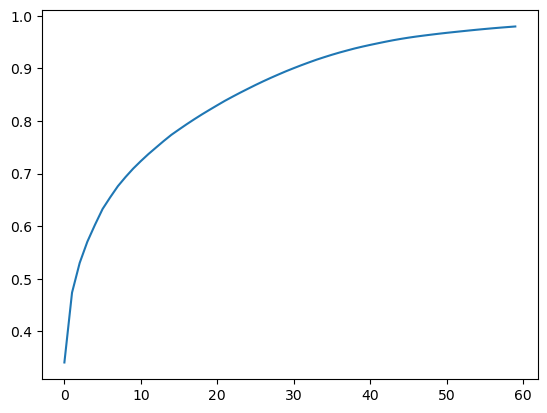

In [40]:
# ALL STRENGTHS:
sns.lineplot(np.cumsum(pca_AS.explained_variance_ratio_[:60]))

<Axes: >

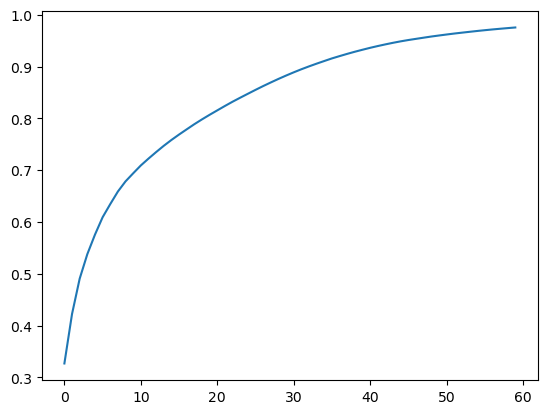

In [41]:
# EVEN STRENGTH:
sns.lineplot(np.cumsum(pca_ES.explained_variance_ratio_[:60]))

<Axes: >

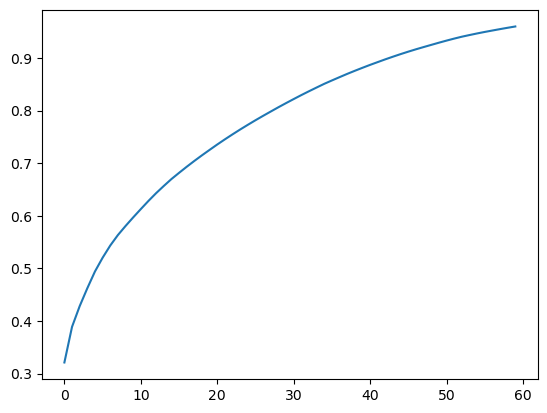

In [ ]:
# POWER PLAY:
sns.lineplot(np.cumsum(pca_PP.explained_variance_ratio_[:60]))

<Axes: >

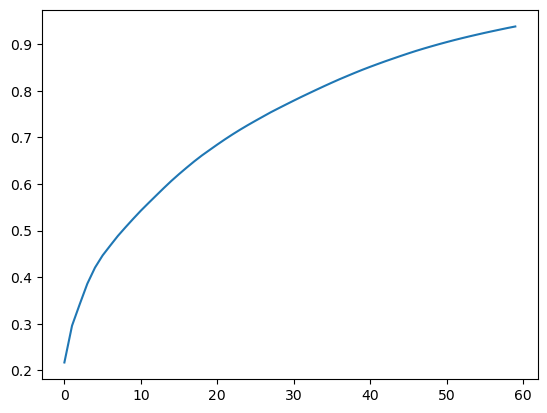

In [ ]:
# PENALTY KILL:
sns.lineplot(np.cumsum(pca_PK.explained_variance_ratio_[:60]))

In [42]:
def create_player_index_dict(df):
      """
    Create a nested dictionary from a DataFrame that maps player names to their indices for each season.

    This function resets the index of the DataFrame to ensure that the index column 
    holds the original row indices. It then groups the DataFrame by 'Player' and 'Season' 
    and aggregates the indices into a list for each group. After grouping, it pivots the DataFrame 
    so each 'Player' name is a row with each 'Season' as columns, containing lists of indices 
    as values. Finally, it converts the pivoted DataFrame into a nested dictionary where each player's 
    name is a key to a dictionary mapping each season to the player's indices.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process, which must contain 'Player' and 'Season' columns 
                           and has a unique index.

    Returns:
    dict: A nested dictionary where the first level keys are player names, and second level keys are 
          seasons, each mapping to a list of index positions for that player in that season.
    """

    # Reset the index 
      df = df.reset_index()

    # Group by 'Player' and 'Season', then aggregate the original index values into a list.
      grouped = df.groupby(['Player', 'Season'])['index'].agg(lambda x: list(x)).reset_index()

    # Pivot the DataFrame to have 'Player' as rows and 'Season' as columns with list of indices as values.
      pivot_df = grouped.pivot(index='Player', columns='Season', values='index')

    # Convert the pivoted DataFrame into a nested dictionary.
      player_index_dict = pivot_df.apply(lambda row: row.dropna().to_dict(), axis=1).to_dict()

      return player_index_dict

In [43]:
player_index_dict_AS = create_player_index_dict(df_all_stats_AS)
player_index_dict_ES = create_player_index_dict(df_all_stats_ES)
player_index_dict_PP = create_player_index_dict(df_all_stats_PP)
player_index_dict_PK = create_player_index_dict(df_all_stats_PK)

In [44]:
def get_index_all_gamestates(player_name, AS_dict= player_index_dict_AS, ES_dict= player_index_dict_ES, PP_dict= player_index_dict_PP, PK_dict= player_index_dict_PK):
    """
    Returns a string with all the indices for each game state (All Strengths, Even Strength,
    Power Play, and Penalty Kill) for a given player.
    
    Parameters:
    - player_name (str): The name of the player to lookup.
    - player_index_dict_AS (dict): The dictionary with indices for All Strengths.
    - player_index_dict_ES (dict): The dictionary with indices for Even Strength.
    - player_index_dict_PP (dict): The dictionary with indices for Power Play.
    - player_index_dict_PK (dict): The dictionary with indices for Penalty Kill.

    Returns:
    - str: A formatted string containing the indices for each game state for the player.
    """
    result_string= (
        f"{player_name}'s ALL STRENGTHS indices are: {AS_dict.get(player_name)}\n"
        f"{player_name}'s EVEN STRENGTH indices are: {ES_dict.get(player_name)}\n"
        f"{player_name}'s POWER PLAY indices are: {PP_dict.get(player_name)}\n"
        f"{player_name}'s PENALTY KILL indices are: {PK_dict.get(player_name)}\n"
    )

    return print(result_string)


## Showing how the indexing works to make the recommendations:

In [45]:
get_index_all_gamestates('Zdeno Chara')
get_index_all_gamestates('Kaiden Guhle')
get_index_all_gamestates('Nick Suzuki')
get_index_all_gamestates('Sidney Crosby')

Zdeno Chara's ALL STRENGTHS indices are: {2022: [0]}
Zdeno Chara's EVEN STRENGTH indices are: {2022: [0]}
Zdeno Chara's POWER PLAY indices are: {2022: [0]}
Zdeno Chara's PENALTY KILL indices are: {2022: [0]}

Kaiden Guhle's ALL STRENGTHS indices are: {2023: [1862], 2024: [2719]}
Kaiden Guhle's EVEN STRENGTH indices are: {2023: [1862], 2024: [2719]}
Kaiden Guhle's POWER PLAY indices are: {2023: [1706], 2024: [2513]}
Kaiden Guhle's PENALTY KILL indices are: {2023: [1645], 2024: [2402]}

Nick Suzuki's ALL STRENGTHS indices are: {2022: [749], 2023: [1643], 2024: [2508]}
Nick Suzuki's EVEN STRENGTH indices are: {2022: [749], 2023: [1643], 2024: [2508]}
Nick Suzuki's POWER PLAY indices are: {2022: [695], 2023: [1510], 2024: [2316]}
Nick Suzuki's PENALTY KILL indices are: {2022: [681], 2023: [1467], 2024: [2224]}

Sidney Crosby's ALL STRENGTHS indices are: {2022: [28], 2023: [1020], 2024: [1963]}
Sidney Crosby's EVEN STRENGTH indices are: {2022: [28], 2023: [1020], 2024: [1963]}
Sidney Crosby

In [53]:
def recommend_skaters(original_gamestate_df, processed_gamestate_df, season, player_index, top_n=6):
    """
    Recommends skaters based on their stats using a preprocessed PCA features.

    Args:
    - original_gamestate_df (pd.DataFrame): DataFrame containing the original skater stats.
        Acceptable inputs for original_gamestate_df are: [df_all_stats_AS, df_all_stats_ES, df_all_stats_PP, df_all_stats_PK]
    - processed_gamestate_df (pd.DataFrame): PCA-transformed and scaled features of the skaters.
        Acceptable inputs for processed_gamestate_df are: 
        [df_all_stats_AS_encoded_dropped_scaled_pca, df_all_stats_ES_encoded_dropped_scaled_pca, 
        df_all_stats_PP_encoded_dropped_scaled_pca, df_all_stats_PK_encoded_dropped_scaled_pca]
    - season (int): The target season for comparison.
        Acceptable inputs for season are: 2022, 2023, 2024
    - player_index (int): Index of the player in the DataFrame to get recommendations for.
        player_index as accessed through the function: get_index_all_gamestates() 
    - top_n (int): Number of top recommendations to return.

    Returns:
    - pd.DataFrame: DataFrame containing the top_n recommended skaters for the given player in the specified season.
    """

    # Filter DataFrame for the target season
    target_season_data = processed_gamestate_df[original_gamestate_df['Season'] == season]

    # Compute pairwise distances between all skaters and those from the target season
    distances = pairwise_distances(processed_gamestate_df, target_season_data)

    # Find the indices of the closest skaters
    indices = np.argsort(distances, axis=1)[:, :top_n]

    # Retrieve the recommendations from the original stats DataFrame
    recommended_skaters = original_gamestate_df[original_gamestate_df['Season'] == season].iloc[indices[player_index], :]

    return recommended_skaters

In [71]:
# Assuming df_all_stats and df_encoded_dropped_scaled_pca are defined, along with the desired season and player index
recommended_skaters_Nick_Suzuki = recommend_skaters(original_gamestate_df=df_all_stats_ES,
                                        processed_gamestate_df=df_all_stats_ES_encoded_dropped_scaled_pca,
                                        season=2022,
                                        player_index=749,
                                        top_n=6)
recommended_skaters_Nick_Suzuki # Nick Suzuki's 2022 season stats compared to other players in 2022

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
749,Nick Suzuki,MTL,C,23,82,1300.116667,11,26,12,14,37,64.91,128,8.59,11.74,202,164,121,54,9,11,22,11,11,0,0,22,62,44,84,87,48,550,548,50.09,1156,1283,47.40,870,957,47.62,646,713,47.53,57,83,40.71,51.01,71.53,41.63,558,694,44.57,203,287,41.43,24,52,31.58,355,407,46.59,24,17,58.54,515,496,50.94,7,8,46.67,8.82,88.36,0.972,209,270,202,891,50.85,413,377,429,49.05,15.855081,0.51,1.20,0.55,0.65,1.71,5.91,0.54,9.32,7.57,5.58,2.49,0.42,0.51,1.02,0.51,0.51,0.00,0.00,1.02,2.86,2.03,3.88,4.02,2.22,25.38,25.29,53.35,59.21,40.15,44.17,29.81,32.90,2.63,3.83,2.35,3.30,25.75,32.03,9.37,13.24,1.11,2.40,21.84,25.04,1.48,1.05,34.33,33.06,0.47,0.53,9.65,12.46,9.32,41.12,19.06,17.40,19.80,2022,Young Pro
207,Mikael Granlund,NSH,C,30,80,1228.616667,8,28,16,12,36,55.38,85,9.41,9.23,162,123,107,38,5,13,27,12,11,1,0,23,38,44,89,102,31,492,533,48.00,1146,1219,48.46,881,921,48.89,614,669,47.86,65,71,47.79,56.71,63.89,47.02,597,560,51.60,213,208,50.59,31,35,46.97,384,352,52.17,19,16,54.29,501,576,46.52,10,12,45.45,10.59,89.39,1.000,238,243,162,873,59.50,502,392,359,58.30,15.357708,0.39,1.37,0.78,0.59,1.76,4.15,0.45,7.91,6.01,5.23,1.86,0.24,0.63,1.32,0.59,0.54,0.05,0.00,1.12,1.86,2.15,4.35,4.98,1.51,24.03,26.03,55.97,59.53,43.02,44.98,29.98,32.67,3.17,3.47,2.77,3.12,29.15,27.35,10.40,10.16,1.51,1.71,25.00,22.92,1.24,1.04,35.34,40.63,0.71,0.85,11.62,11.87,7.91,42.63,24.52,19.14,17.53,2022,Prime Age
183,Charlie Coyle,BOS,C,30,82,1131.250000,13,21,13,8,34,61.82,105,12.38,12.31,168,148,100,46,5,20,28,10,9,0,1,13,35,30,78,67,31,469,464,50.27,1091,1053,50.89,881,795,52.57,669,571,53.95,55,58,48.67,52.40,51.62,50.38,512,494,50.89,204,200,50.50,26,34,43.33,308,294,51.16,19,15,55.88,526,508,50.87,10,5,66.67,8.22,89.84,0.981,154,238,165,835,48.28,362,351,347,51.06,13.795732,0.69,1.11,0.69,0.42,1.80,5.57,0.65,8.91,7.85,5.30,2.44,0.27,1.06,1.49,0.53,0.48,0.00,0.05,0.69,1.86,1.59,4.14,3.55,1.64,24.88,24.61,57.87,55.85,46.73,42.17,35.48,30.29,2.92,3.08,2.78,2.74,27.16,26.20,10.82,10.61,1.38,1.80,21.78,20.79,1.34,1.06,40.30,38.92,0.77,0.38,8.17,12.62,8.75,44.29,19.20,18.62,18.40,2022,Prime Age
813,Pius Suter,DET,C,26,82,1132.483333,14,18,12,6,32,65.31,137,10.22,16.85,222,178,162,71,8,21,22,11,11,0,0,9,31,29,24,34,26,431,431,50.00,1004,1121,47.25,751,885,45.90,578,664,46.54,49,58,45.79,51.97,54.99,48.59,523,576,47.59,206,239,46.29,22,32,40.74,317,337,48.47,17,16,51.52,434,510,45.97,7,7,50.00,8.48,91.27,0.997,164,226,156,771,51.25,331,308,324,50.53,13.810772,0.74,0.95,0.64,0.32,1.70,7.26,0.89,11.76,9.43,8.58,3.76,0.42,1.11,1.17,0.58,0.58,0.00,0.00,0.48,1.64,1.54,1.27,1.80,1.38,22.83,22.83,53.19,59.39,39.79,46.89,30.62,35.18,2.60,3.07,2.75,2.91,27.71,30.52,10

In [60]:

def get_players_baseline_gamestate_stats(original_gamestate_df, player_name):
    baseline_gamestate_stats = original_gamestate_df.loc[original_gamestate_df['Player'] == player_name]
    return baseline_gamestate_stats

In [61]:
get_players_baseline_gamestate_stats(original_gamestate_df=df_all_stats_ES,
                                     player_name='Nick Suzuki')

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
749,Nick Suzuki,MTL,C,23,82,1300.116667,11,26,12,14,37,64.91,128,8.59,11.74,202,164,121,54,9,11,22,11,11,0,0,22,62,44,84,87,48,550,548,50.09,1156,1283,47.40,870,957,47.62,646,713,47.53,57,83,40.71,51.01,71.53,41.63,558,694,44.57,203,287,41.43,24,52,31.58,355,407,46.59,24,17,58.54,515,496,50.94,7,8,46.67,8.82,88.36,0.972,209,270,202,891,50.85,413,377,429,49.05,15.855081,0.51,1.20,0.55,0.65,1.71,5.91,0.54,9.32,7.57,5.58,2.49,0.42,0.51,1.02,0.51,0.51,0.00,0.00,1.02,2.86,2.03,3.88,4.02,2.22,25.38,25.29,53.35,59.21,40.15,44.17,29.81,32.90,2.63,3.83,2.35,3.30,25.75,32.03,9.37,13.24,1.11,2.40,21.84,25.04,1.48,1.05,34.33,33.06,0.47,0.53,9.65,12.46,9.32,41.12,19.06,17.40,19.80,2022,Young Pro
1643,Nick Suzuki,MTL,C,24,82,1316.266667,16,30,18,12,46,63.89,116,13.79,10.70,200,151,109,46,9,15,29,9,7,1,1,20,44,36,45,64,43,517,578,47.21,1179,1335,46.90,863,971,47.06,618,710,46.54,72,87,45.28,55.83,82.25,40.43,543,724,42.86,213,316,40.26,31,51,37.80,330,408,44.72,26,23,53.06,553,523,51.39,14,8,63.64,11.65,87.75,0.994,221,287,182,788,54.84,425,418,391,52.08,16.052033,0.73,1.37,0.82,0.55,2.10,5.29,0.49,9.12,6.88,4.97,2.10,0.41,0.68,1.32,0.41,0.32,0.05,0.05,0.91,2.01,1.64,2.05,2.92,1.96,23.57,26.35,53.74,60.85,39.34,44.26,28.17,32.36,3.28,3.97,2.54,3.75,24.75,33.00,9.71,14.40,1.41,2.32,20.06,24.80,1.58,1.40,36.41,34.44,0.92,0.53,10.07,13.08,8.30,35.92,19.37,19.05,17.82,2023,Young Pro
2508,Nick Suzuki,MTL,C,25,82,1364.183333,20,25,15,10,45,63.38,130,15.38,15.24,240,196,146,63,11,15,30,14,14,0,0,18,52,37,56,92,41,571,543,51.26,1355,1376,49.62,996,991,50.13,688,682,50.22,71,79,47.33,65.67,69.46,48.60,652,700,48.22,253,259,49.41,34,29,53.97,399,441,47.50,22,29,43.14,790,723,52.21,13,16,44.83,10.32,88.42,0.987,249,322,196,797,55.96,446,437,401,52.66,16.636382,0.88,1.10,0.66,0.44,1.98,5.72,0.67,10.56,8.62,6.42,2.77,0.48,0.66,1.32,0.62,0.62,0.00,0.00,0.79,2.29,1.63,2.46,4.05,1.80,25.11,23.88,59.60,60.52,43.81,43.59,30.26,30.00,3.12,3.47,2.89,3.06,28.68,30.79,11.13,11.39,1.50,1.28,23.40,25.86,1.29,1.70,50.19,45.93,0.83,1.02,10.95,14.16,8.62,35.05,19.62,19.22,17.64,2024,Young Pro


## Nick Suzuki - Player Development Tracking:

### 2022 Comparisons:  USING ES

In [52]:
# Getting Nick Suzuki Indices:
get_index_all_gamestates('Nick Suzuki')

Nick Suzuki's ALL STRENGTHS indices are: {2022: [749], 2023: [1643], 2024: [2508]}
Nick Suzuki's EVEN STRENGTH indices are: {2022: [749], 2023: [1643], 2024: [2508]}
Nick Suzuki's POWER PLAY indices are: {2022: [695], 2023: [1510], 2024: [2316]}
Nick Suzuki's PENALTY KILL indices are: {2022: [681], 2023: [1467], 2024: [2224]}



In [70]:
get_players_baseline_gamestate_stats(original_gamestate_df=df_all_stats_ES,
                                     player_name='Nick Suzuki')

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
749,Nick Suzuki,MTL,C,23,82,1300.116667,11,26,12,14,37,64.91,128,8.59,11.74,202,164,121,54,9,11,22,11,11,0,0,22,62,44,84,87,48,550,548,50.09,1156,1283,47.40,870,957,47.62,646,713,47.53,57,83,40.71,51.01,71.53,41.63,558,694,44.57,203,287,41.43,24,52,31.58,355,407,46.59,24,17,58.54,515,496,50.94,7,8,46.67,8.82,88.36,0.972,209,270,202,891,50.85,413,377,429,49.05,15.855081,0.51,1.20,0.55,0.65,1.71,5.91,0.54,9.32,7.57,5.58,2.49,0.42,0.51,1.02,0.51,0.51,0.00,0.00,1.02,2.86,2.03,3.88,4.02,2.22,25.38,25.29,53.35,59.21,40.15,44.17,29.81,32.90,2.63,3.83,2.35,3.30,25.75,32.03,9.37,13.24,1.11,2.40,21.84,25.04,1.48,1.05,34.33,33.06,0.47,0.53,9.65,12.46,9.32,41.12,19.06,17.40,19.80,2022,Young Pro
1643,Nick Suzuki,MTL,C,24,82,1316.266667,16,30,18,12,46,63.89,116,13.79,10.70,200,151,109,46,9,15,29,9,7,1,1,20,44,36,45,64,43,517,578,47.21,1179,1335,46.90,863,971,47.06,618,710,46.54,72,87,45.28,55.83,82.25,40.43,543,724,42.86,213,316,40.26,31,51,37.80,330,408,44.72,26,23,53.06,553,523,51.39,14,8,63.64,11.65,87.75,0.994,221,287,182,788,54.84,425,418,391,52.08,16.052033,0.73,1.37,0.82,0.55,2.10,5.29,0.49,9.12,6.88,4.97,2.10,0.41,0.68,1.32,0.41,0.32,0.05,0.05,0.91,2.01,1.64,2.05,2.92,1.96,23.57,26.35,53.74,60.85,39.34,44.26,28.17,32.36,3.28,3.97,2.54,3.75,24.75,33.00,9.71,14.40,1.41,2.32,20.06,24.80,1.58,1.40,36.41,34.44,0.92,0.53,10.07,13.08,8.30,35.92,19.37,19.05,17.82,2023,Young Pro
2508,Nick Suzuki,MTL,C,25,82,1364.183333,20,25,15,10,45,63.38,130,15.38,15.24,240,196,146,63,11,15,30,14,14,0,0,18,52,37,56,92,41,571,543,51.26,1355,1376,49.62,996,991,50.13,688,682,50.22,71,79,47.33,65.67,69.46,48.60,652,700,48.22,253,259,49.41,34,29,53.97,399,441,47.50,22,29,43.14,790,723,52.21,13,16,44.83,10.32,88.42,0.987,249,322,196,797,55.96,446,437,401,52.66,16.636382,0.88,1.10,0.66,0.44,1.98,5.72,0.67,10.56,8.62,6.42,2.77,0.48,0.66,1.32,0.62,0.62,0.00,0.00,0.79,2.29,1.63,2.46,4.05,1.80,25.11,23.88,59.60,60.52,43.81,43.59,30.26,30.00,3.12,3.47,2.89,3.06,28.68,30.79,11.13,11.39,1.50,1.28,23.40,25.86,1.29,1.70,50.19,45.93,0.83,1.02,10.95,14.16,8.62,35.05,19.62,19.22,17.64,2024,Young Pro


In [56]:

recommended_skaters = recommend_skaters(original_gamestate_df=df_all_stats_ES,
                                        processed_gamestate_df=df_all_stats_ES_encoded_dropped_scaled_pca,
                                        season=2022,
                                        player_index=749,
                                        top_n=6)
recommended_skaters # Nick Suzuki's 2022 season stats compared to other players in 2022

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
749,Nick Suzuki,MTL,C,23,82,1300.116667,11,26,12,14,37,64.91,128,8.59,11.74,202,164,121,54,9,11,22,11,11,0,0,22,62,44,84,87,48,550,548,50.09,1156,1283,47.40,870,957,47.62,646,713,47.53,57,83,40.71,51.01,71.53,41.63,558,694,44.57,203,287,41.43,24,52,31.58,355,407,46.59,24,17,58.54,515,496,50.94,7,8,46.67,8.82,88.36,0.972,209,270,202,891,50.85,413,377,429,49.05,15.855081,0.51,1.20,0.55,0.65,1.71,5.91,0.54,9.32,7.57,5.58,2.49,0.42,0.51,1.02,0.51,0.51,0.00,0.00,1.02,2.86,2.03,3.88,4.02,2.22,25.38,25.29,53.35,59.21,40.15,44.17,29.81,32.90,2.63,3.83,2.35,3.30,25.75,32.03,9.37,13.24,1.11,2.40,21.84,25.04,1.48,1.05,34.33,33.06,0.47,0.53,9.65,12.46,9.32,41.12,19.06,17.40,19.80,2022,Young Pro
207,Mikael Granlund,NSH,C,30,80,1228.616667,8,28,16,12,36,55.38,85,9.41,9.23,162,123,107,38,5,13,27,12,11,1,0,23,38,44,89,102,31,492,533,48.00,1146,1219,48.46,881,921,48.89,614,669,47.86,65,71,47.79,56.71,63.89,47.02,597,560,51.60,213,208,50.59,31,35,46.97,384,352,52.17,19,16,54.29,501,576,46.52,10,12,45.45,10.59,89.39,1.000,238,243,162,873,59.50,502,392,359,58.30,15.357708,0.39,1.37,0.78,0.59,1.76,4.15,0.45,7.91,6.01,5.23,1.86,0.24,0.63,1.32,0.59,0.54,0.05,0.00,1.12,1.86,2.15,4.35,4.98,1.51,24.03,26.03,55.97,59.53,43.02,44.98,29.98,32.67,3.17,3.47,2.77,3.12,29.15,27.35,10.40,10.16,1.51,1.71,25.00,22.92,1.24,1.04,35.34,40.63,0.71,0.85,11.62,11.87,7.91,42.63,24.52,19.14,17.53,2022,Prime Age
183,Charlie Coyle,BOS,C,30,82,1131.250000,13,21,13,8,34,61.82,105,12.38,12.31,168,148,100,46,5,20,28,10,9,0,1,13,35,30,78,67,31,469,464,50.27,1091,1053,50.89,881,795,52.57,669,571,53.95,55,58,48.67,52.40,51.62,50.38,512,494,50.89,204,200,50.50,26,34,43.33,308,294,51.16,19,15,55.88,526,508,50.87,10,5,66.67,8.22,89.84,0.981,154,238,165,835,48.28,362,351,347,51.06,13.795732,0.69,1.11,0.69,0.42,1.80,5.57,0.65,8.91,7.85,5.30,2.44,0.27,1.06,1.49,0.53,0.48,0.00,0.05,0.69,1.86,1.59,4.14,3.55,1.64,24.88,24.61,57.87,55.85,46.73,42.17,35.48,30.29,2.92,3.08,2.78,2.74,27.16,26.20,10.82,10.61,1.38,1.80,21.78,20.79,1.34,1.06,40.30,38.92,0.77,0.38,8.17,12.62,8.75,44.29,19.20,18.62,18.40,2022,Prime Age
813,Pius Suter,DET,C,26,82,1132.483333,14,18,12,6,32,65.31,137,10.22,16.85,222,178,162,71,8,21,22,11,11,0,0,9,31,29,24,34,26,431,431,50.00,1004,1121,47.25,751,885,45.90,578,664,46.54,49,58,45.79,51.97,54.99,48.59,523,576,47.59,206,239,46.29,22,32,40.74,317,337,48.47,17,16,51.52,434,510,45.97,7,7,50.00,8.48,91.27,0.997,164,226,156,771,51.25,331,308,324,50.53,13.810772,0.74,0.95,0.64,0.32,1.70,7.26,0.89,11.76,9.43,8.58,3.76,0.42,1.11,1.17,0.58,0.58,0.00,0.00,0.48,1.64,1.54,1.27,1.80,1.38,22.83,22.83,53.19,59.39,39.79,46.89,30.62,35.18,2.60,3.07,2.75,2.91,27.71,30.52,10

### 2023 Comparisons:

In [57]:
# Assuming df_all_stats and df_encoded_dropped_scaled_pca are defined, along with the desired season and player index
recommended_skaters = recommend_skaters(original_gamestate_df=df_all_stats_ES,
                                        processed_gamestate_df=df_all_stats_ES_encoded_dropped_scaled_pca,
                                        season=2023,
                                        player_index=1643,
                                        top_n=6)
recommended_skaters # Nick Suzuki's 2023 season stats compared to other players in 2023

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
1643,Nick Suzuki,MTL,C,24,82,1316.266667,16,30,18,12,46,63.89,116,13.79,10.70,200,151,109,46,9,15,29,9,7,1,1,20,44,36,45,64,43,517,578,47.21,1179,1335,46.90,863,971,47.06,618,710,46.54,72,87,45.28,55.83,82.25,40.43,543,724,42.86,213,316,40.26,31,51,37.80,330,408,44.72,26,23,53.06,553,523,51.39,14,8,63.64,11.65,87.75,0.994,221,287,182,788,54.84,425,418,391,52.08,16.052033,0.73,1.37,0.82,0.55,2.10,5.29,0.49,9.12,6.88,4.97,2.10,0.41,0.68,1.32,0.41,0.32,0.05,0.05,0.91,2.01,1.64,2.05,2.92,1.96,23.57,26.35,53.74,60.85,39.34,44.26,28.17,32.36,3.28,3.97,2.54,3.75,24.75,33.00,9.71,14.40,1.41,2.32,20.06,24.80,1.58,1.40,36.41,34.44,0.92,0.53,10.07,13.08,8.30,35.92,19.37,19.05,17.82,2023,Young Pro
1645,Robert Thomas,STL,C,24,73,1103.683333,12,30,20,10,42,59.15,77,15.58,9.38,126,106,92,42,2,7,18,9,9,0,0,11,24,59,14,58,25,515,444,53.70,986,1097,47.34,749,850,46.84,554,604,47.84,71,77,47.97,51.28,72.53,41.42,544,625,46.54,172,252,40.57,30,46,39.47,372,373,49.93,28,18,60.87,383,404,48.67,10,6,62.50,12.82,87.25,1.001,193,222,155,782,55.46,403,325,331,54.90,15.118950,0.65,1.63,1.09,0.54,2.28,4.19,0.51,6.85,5.76,5.00,2.28,0.11,0.38,0.98,0.49,0.49,0.00,0.00,0.60,1.30,3.21,0.76,3.15,1.36,28.00,24.14,53.60,59.64,40.72,46.21,30.12,32.84,3.86,4.19,2.79,3.94,29.57,33.98,9.35,13.70,1.63,2.50,26.96,27.04,2.03,1.30,30.08,31.72,0.79,0.47,10.49,12.07,8.43,42.51,21.91,17.67,17.99,2023,Young Pro
1109,Brayden Schenn,STL,C,32,82,1237.033333,15,35,19,16,50,79.37,108,13.89,11.72,200,152,127,47,2,9,38,16,14,2,0,17,39,37,136,63,28,372,445,45.53,1079,1305,45.26,795,1000,44.29,585,720,44.83,63,83,43.15,50.23,79.23,38.80,548,720,43.22,200,301,39.92,30,41,42.25,348,419,45.37,24,21,53.33,446,524,45.98,6,15,28.57,10.77,88.47,0.992,177,299,189,820,48.36,386,393,400,49.11,15.085772,0.73,1.70,0.92,0.78,2.43,5.24,0.57,9.70,7.37,6.16,2.28,0.10,0.44,1.84,0.78,0.68,0.10,0.00,0.82,1.89,1.79,6.60,3.06,1.36,18.04,21.58,52.33,63.30,38.56,48.50,28.37,34.92,3.06,4.03,2.44,3.84,26.58,34.92,9.70,14.60,1.46,1.99,22.51,27.10,1.55,1.36,31.25,36.71,0.42,1.05,8.59,14.50,9.17,39.77,18.72,19.06,19.40,2023,Vet
1213,Ryan Strome,ANA,C,30,82,1205.633333,14,23,11,12,37,64.91,111,12.61,12.40,169,139,100,56,8,21,66,26,23,2,1,10,47,27,28,49,21,346,455,43.20,1077,1404,43.41,822,1111,42.52,594,806,42.43,57,84,40.43,51.62,82.26,38.56,548,763,41.80,212,374,36.18,25,51,32.89,336,389,46.34,24,19,55.81,463,574,44.65,8,10,44.44,9.60,89.58,0.992,248,262,191,821,56.49,434,381,365,54.32,14.702846,0.70,1.14,0.55,0.60,1.84,5.52,0.62,8.41,6.92,4.98,2.79,0.40,1.05,3.28,1.29,1.14,0.10,0.05,0.50,2.34,1.34,1.39,2.44,1.05,17.22,22.64,53.60,69.87,40.91,55.29,29.56,40.11,2.84,4.18,2.57,4.09,27.27,37.97,10

### 2024 Comparisons:

In [58]:
# Assuming df_all_stats and df_encoded_dropped_scaled_pca are defined, along with the desired season and player index
recommended_skaters = recommend_skaters(original_gamestate_df=df_all_stats_ES,
                                        processed_gamestate_df=df_all_stats_ES_encoded_dropped_scaled_pca,
                                        season=2024,
                                        player_index=2508,
                                        top_n=6)
recommended_skaters # Nick Suzuki's 2024 stats compared to players in 2024

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
2508,Nick Suzuki,MTL,C,25,82,1364.183333,20,25,15,10,45,63.38,130,15.38,15.24,240,196,146,63,11,15,30,14,14,0,0,18,52,37,56,92,41,571,543,51.26,1355,1376,49.62,996,991,50.13,688,682,50.22,71,79,47.33,65.67,69.46,48.60,652,700,48.22,253,259,49.41,34,29,53.97,399,441,47.50,22,29,43.14,790,723,52.21,13,16,44.83,10.32,88.42,0.987,249,322,196,797,55.96,446,437,401,52.66,16.636382,0.88,1.10,0.66,0.44,1.98,5.72,0.67,10.56,8.62,6.42,2.77,0.48,0.66,1.32,0.62,0.62,0.0,0.00,0.79,2.29,1.63,2.46,4.05,1.80,25.11,23.88,59.60,60.52,43.81,43.59,30.26,30.00,3.12,3.47,2.89,3.06,28.68,30.79,11.13,11.39,1.50,1.28,23.40,25.86,1.29,1.70,50.19,45.93,0.83,1.02,10.95,14.16,8.62,35.05,19.62,19.22,17.64,2024,Young Pro
2510,Robert Thomas,STL,C,25,81,1289.266667,16,39,24,15,55,71.43,109,14.68,15.47,208,159,142,65,6,14,40,16,15,0,1,15,41,56,14,61,42,648,558,53.73,1351,1304,50.89,1008,978,50.76,692,649,51.60,77,66,53.85,74.01,74.30,49.90,674,618,52.17,264,281,48.44,34,27,55.74,410,337,54.89,33,22,60.00,814,780,51.07,4,10,28.57,11.13,89.83,1.010,223,291,226,756,49.67,479,402,451,51.51,15.916872,0.74,1.81,1.12,0.70,2.56,5.07,0.72,9.68,7.40,6.61,3.02,0.28,0.65,1.86,0.74,0.70,0.0,0.05,0.70,1.91,2.61,0.65,2.84,1.95,30.16,25.97,62.87,60.69,46.91,45.51,32.20,30.20,3.58,3.07,3.44,3.46,31.37,28.76,12.29,13.08,1.58,1.26,25.44,20.91,2.05,1.37,54.72,52.43,0.27,0.67,10.38,13.54,10.52,35.18,22.29,18.71,20.99,2024,Young Pro
2349,Dylan Strome,WSH,C,27,82,1227.583333,21,24,17,7,45,76.27,125,16.80,16.20,242,186,158,80,7,24,20,10,10,0,0,10,26,39,11,39,59,529,507,51.06,1314,1267,50.91,928,895,50.91,604,598,50.25,59,68,46.46,65.08,64.44,50.25,653,566,53.57,283,234,54.74,33,30,52.38,370,332,52.71,19,24,44.19,773,655,54.13,7,12,36.84,9.77,88.63,0.984,236,256,120,921,66.29,464,338,265,63.65,14.970528,1.03,1.17,0.83,0.34,2.20,6.11,0.79,11.83,9.09,7.72,3.91,0.34,1.17,0.98,0.49,0.49,0.0,0.00,0.49,1.27,1.91,0.54,1.91,2.88,25.86,24.78,64.22,61.93,45.36,43.74,29.52,29.23,2.88,3.32,3.18,3.15,31.92,27.66,13.83,11.44,1.61,1.47,24.11,21.64,1.24,1.56,54.57,46.24,0.49,0.85,11.53,12.51,5.87,45.02,22.68,16.52,12.95,2024,Prime Age
2497,Casey Mittelstadt,COL,C,26,79,1206.666667,15,32,17,15,47,61.84,103,14.56,10.27,196,137,102,41,5,18,22,11,11,0,0,6,37,43,19,86,29,443,509,46.53,1220,1107,52.43,903,799,53.06,635,540,54.04,76,64,54.29,58.75,58.38,50.16,590,504,53.93,246,218,53.02,30,35,46.15,344,286,54.60,31,17,64.58,742,644,53.54,14,10,58.33,11.97,88.15,1.001,244,244,178,782,57.82,440,335,360,55.00,15.274262,0.75,1.59,0.85,0.75,2.34,5.12,0.51,9.75,6.81,5.07,2.04,0.25,0.90,1.09,0.55,0.55,0.0,0.00,0.30,1.84,2.14,0.94,4.28,1.44,22.03,25.31,60.66,55.04,44.90,39.73,31.57,26.85,3.78,3.18,2.

In [59]:
# PP RECOMMENDER:
# Assuming df_all_stats and df_encoded_dropped_scaled_pca are defined, along with the desired season and player index
recommended_skaters = recommend_skaters(original_gamestate_df=df_all_stats_PP,
                                        processed_gamestate_df=df_all_stats_PP_encoded_dropped_scaled_pca,
                                        season=2024,
                                        player_index=2316,
                                        top_n=6)
recommended_skaters 

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
2316,Nick Suzuki,MTL,C,25,82,299.666667,13,19,10,9,32,82.05,50,26.00,6.73,76,64,48,18,1,7,6,2,2,0,0,2,9,2,2,14,0,88,59,59.86,490,77,86.42,380,67,85.01,273,56,82.98,39,8,82.98,39.06,5.22,88.22,273,36,88.35,100,19,84.03,17,4,80.95,173,17,91.05,13,3,81.25,375,22,94.46,9,1,90.0,14.29,85.71,1.000,135,19,1,18,99.26,287,35,10,96.63,3.654472,2.60,3.80,2.00,1.80,6.41,10.01,1.35,15.22,12.81,9.61,3.60,0.20,1.40,1.20,0.40,0.40,0.0,0.0,0.40,1.80,0.40,0.40,2.80,0.00,17.62,11.81,98.11,15.42,76.08,13.41,54.66,11.21,7.81,1.60,7.82,1.04,54.66,7.21,20.02,3.80,3.40,0.80,46.18,4.54,3.47,0.80,108.45,6.36,2.60,0.29,27.03,3.80,0.20,3.60,57.46,7.01,2.00,2024,Young Pro
2318,Robert Thomas,STL,C,25,81,263.633333,8,19,9,10,27,79.41,52,15.38,6.17,107,73,48,11,0,9,6,3,3,0,0,1,11,2,0,10,0,130,104,55.56,478,60,88.85,340,57,85.64,237,45,84.04,34,6,85.00,35.92,6.67,84.35,284,38,88.20,106,16,86.89,16,4,80.00,178,22,89.00,10,1,90.91,341,10,97.15,8,0,100.0,14.35,86.67,1.010,153,19,0,23,100.00,276,32,10,96.50,3.254733,1.82,4.32,2.05,2.28,6.14,11.83,1.40,24.35,16.61,10.92,2.50,0.00,2.05,1.37,0.68,0.68,0.0,0.0,0.23,2.50,0.46,0.00,2.28,0.00,29.59,23.67,108.79,13.66,77.38,12.97,53.94,10.24,7.74,1.37,8.18,1.52,64.64,8.65,24.12,3.64,3.64,0.91,54.01,6.68,3.03,0.30,112.10,3.29,2.63,0.00,34.82,4.32,0.00,5.23,62.81,7.28,2.28,2024,Young Pro
2455,Cole Caufield,MTL,R,23,82,295.816667,9,12,5,7,21,52.50,75,12.00,10.93,130,108,66,22,1,9,2,1,1,0,0,1,7,2,1,10,2,0,0,0.00,487,80,85.89,379,70,84.41,273,59,82.23,40,9,81.63,39.70,5.68,87.49,275,39,87.58,103,22,82.40,18,4,81.82,172,17,91.01,13,4,76.47,369,21,94.62,9,1,90.0,14.65,84.75,0.994,148,18,1,23,99.33,283,35,9,96.92,3.607520,1.83,2.43,1.01,1.42,4.26,15.21,2.22,26.37,21.91,13.39,4.46,0.20,1.83,0.41,0.20,0.20,0.0,0.0,0.20,1.42,0.41,0.20,2.03,0.41,0.00,0.00,98.78,16.23,76.87,14.20,55.37,11.97,8.11,1.83,8.05,1.15,55.78,7.91,20.89,4.46,3.65,0.81,46.52,4.60,3.52,1.08,108.11,6.15,2.64,0.29,30.02,3.65,0.20,4.67,57.40,7.10,1.83,2024,Young Pro
1864,Nazem Kadri,CGY,C,34,81,250.416667,10,12,7,5,22,64.71,59,16.95,11.65,108,85,81,46,1,10,6,3,3,0,0,1,13,3,2,10,1,109,92,54.23,488,70,87.46,353,58,85.89,235,44,84.23,34,6,85.00,40.11,5.50,87.95,276,41,87.07,125,24,83.89,17,3,85.00,151,17,89.88,10,3,76.92,361,20,94.75,7,0,100.0,14.47,86.36,1.008,122,22,0,21,100.00,278,38,8,97.20,3.091564,2.40,2.88,1.68,1.20,5.27,14.14,2.79,25.88,20.37,19.41,11.02,0.24,2.40,1.44,0.72,0.72,0.0,0.0,0.24,3.11,0.72,0.48,2.40,0.24,26.12,22.04,116.93,16.77,84.58,13.90,56.31,10.54,8.15,1.44,9.61,1.32,66.13,9.82,29.95,5.75,4.07,0.72,48.24,5.43,3.19,0.96,124.94,6.92,2.42,0.00,29.23,5.27,0.00,5.03,66.61,9.10,1.92,2024,Vet
2465,Jack Hughes,N.J,C,23,62,236.600000,9,

# RFA and Arbitratoion Use Case: 
## Ryan Lindgren 

In [ ]:
get_index_all_gamestates('Ryan Lindgren')

Ryan Lindgren's ALL STRENGTHS indices are: {2022: [621], 2023: [1530], 2024: [2412]}
Ryan Lindgren's EVEN STRENGTH indices are: {2022: [621], 2023: [1530], 2024: [2412]}
Ryan Lindgren's POWER PLAY indices are: {2022: [578], 2023: [1411], 2024: [2228]}
Ryan Lindgren's PENALTY KILL indices are: {2022: [568], 2023: [1372], 2024: [2143]}



In [64]:
get_players_baseline_gamestate_stats(df_all_stats_PK, 'Ryan Lindgren')

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
568,Ryan Lindgren,NYR,D,24,78,174.133333,0,0,0,0,0,0.0,1,0.0,0.00,2,1,0,0,0,0,0,0,0,0,0,0,7,3,16,4,25,0,0,0.0,39,293,11.75,35,222,13.62,27,164,14.14,4,15,21.05,2.29,21.30,9.73,21,157,11.80,13,67,16.25,3,3,50.00,8,90,8.16,1,4,20.0,10,142,6.58,0,8,0.0,14.81,90.85,1.057,3,19,130,101,2.26,5,28,185,2.63,2.232479,0.00,0.00,0.0,0.00,0.00,0.34,0.00,0.69,0.34,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,2.41,1.03,5.51,1.38,8.61,0.0,0.0,13.44,100.96,12.06,76.49,9.30,56.51,1.38,5.17,0.79,7.34,7.24,54.10,4.48,23.09,1.03,1.03,3.68,41.35,0.46,1.84,4.98,70.67,0.0,3.98,1.03,6.55,44.79,34.80,1.72,9.65,63.74,2022,Young Pro
1372,Ryan Lindgren,NYR,D,25,63,130.583333,1,1,0,1,2,50.0,2,50.0,0.39,2,2,1,0,1,0,4,2,2,0,0,1,1,3,7,6,23,0,0,0.0,48,211,18.53,43,153,21.94,32,110,22.54,4,17,19.05,3.53,16.83,17.34,30,125,19.35,14,54,20.59,2,7,22.22,16,71,18.39,1,9,10.0,7,91,7.14,0,1,0.0,12.50,84.55,0.970,2,13,114,55,1.72,5,19,141,3.42,2.072751,0.46,0.46,0.0,0.46,0.92,0.92,0.18,0.92,0.92,0.46,0.0,0.46,0.0,1.84,0.92,0.92,0.0,0.0,0.46,0.46,1.38,3.22,2.76,10.57,0.0,0.0,22.05,96.95,19.76,70.30,14.70,50.54,1.84,7.81,1.62,7.73,13.78,57.43,6.43,24.81,0.92,3.22,9.80,43.50,0.61,5.51,4.65,60.40,0.0,0.66,0.92,5.97,52.38,25.27,2.30,8.73,64.79,2023,Young Pro
2143,Ryan Lindgren,NYR,D,26,76,207.616667,0,0,0,0,0,0.0,1,0.0,0.08,3,2,1,0,1,0,8,4,4,0,0,3,0,5,14,7,26,0,0,0.0,48,372,11.43,43,272,13.65,28,186,13.08,2,18,10.00,2.90,27.39,9.56,25,181,12.14,10,82,10.87,1,9,10.00,15,99,13.16,1,3,25.0,18,330,5.17,0,6,0.0,7.14,90.32,0.975,2,18,147,77,1.34,8,31,255,3.04,2.731798,0.00,0.00,0.0,0.00,0.00,0.29,0.02,0.87,0.58,0.29,0.0,0.29,0.0,2.31,1.16,1.16,0.0,0.0,0.87,0.00,1.44,4.05,2.02,7.51,0.0,0.0,13.87,107.51,12.43,78.61,8.09,53.75,0.58,5.20,0.84,7.92,7.22,52.31,2.89,23.70,0.29,2.60,5.78,38.15,0.39,1.16,7.51,137.75,0.0,2.50,0.58,5.20,42.48,22.25,2.31,8.96,73.69,2024,Prime Age


### ES:

In [69]:
# ES - 2022
Lindgren_recommended_skaters = recommend_skaters(original_gamestate_df=df_all_stats_ES,
                  processed_gamestate_df=df_all_stats_ES_encoded_dropped_scaled_pca,
                  season=2022,
                  player_index=621,
                  top_n=5)

Lindgren_recommended_skaters

,Player,Team,Position,Age,GP,TOI,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iFF,iSCF,iHDCF,Rush Attempts,Rebounds Created,PIM,Total Penalties,Minor,Major,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %,TOI/GP,Goals/60,Total Assists/60,First Assists/60,Second Assists/60,Total Points/60,Shots/60,ixG/60,iCF/60,iFF/60,iSCF/60,iHDCF/60,Rush Attempts/60,Rebounds Created/60,PIM/60,Total Penalties/60,Minor/60,Major/60,Misconduct/60,Penalties Drawn/60,Giveaways/60,Takeaways/60,Hits/60,Hits Taken/60,Shots Blocked/60,Faceoffs Won/60,Faceoffs Lost/60,CF/60,CA/60,FF/60,FA/60,SF/60,SA/60,GF/60,GA/60,xGF/60,xGA/60,SCF/60,SCA/60,HDCF/60,HDCA/60,HDGF/60,HDGA/60,MDCF/60,MDCA/60,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDGF/60,LDGA/60,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Season,Age_Group
621,Ryan Lindgren,NYR,D,24,78,1387.75,4,11,6,5,15,25.00,72,5.56,4.38,152,99,49,11,1,8,44,22,22,0,0,15,25,16,113,141,105,0,0,0.0,1148,1249,47.89,877,927,48.61,643,649,49.77,60,46,56.60,57.87,54.86,51.34,590,622,48.68,263,239,52.39,34,32,51.52,327,383,46.06,15,9,62.50,501,569,46.82,9,5,64.29,9.33,92.91,1.022,207,269,199,1118,50.99,474,402,402,54.11,17.791667,0.17,0.48,0.26,0.22,0.65,3.11,0.19,6.57,4.28,2.12,0.48,0.04,0.35,1.90,0.95,0.95,0.00,0.0,0.65,1.08,0.69,4.89,6.10,4.54,0.0,0.0,49.63,54.00,37.92,40.08,27.80,28.06,2.59,1.99,2.50,2.37,25.51,26.89,11.37,10.33,1.47,1.38,18.85,22.08,0.86,0.52,31.29,35.53,0.56,0.31,8.95,11.63,8.60,48.34,20.49,17.38,17.38,2022,Young Pro
821,Martin Fehervary,WSH,D,23,79,1407.90,7,8,5,3,15,20.83,93,7.53,4.55,177,122,50,15,4,10,24,12,12,0,0,8,34,13,237,192,88,0,0,0.0,1294,1369,48.59,1003,1036,49.19,719,720,49.97,72,59,54.96,65.33,64.33,50.39,632,685,47.99,263,277,48.70,38,33,53.52,369,408,47.49,20,14,58.82,585,617,48.67,8,12,40.00,10.01,91.81,1.018,206,303,160,1055,56.28,496,462,406,54.99,17.821519,0.30,0.34,0.21,0.13,0.64,3.96,0.19,7.54,5.20,2.13,0.64,0.17,0.43,1.02,0.51,0.51,0.00,0.0,0.34,1.45,0.55,10.10,8.18,3.75,0.0,0.0,55.15,58.34,42.74,44.15,30.64,30.68,3.07,2.51,2.78,2.74,26.93,29.19,11.21,11.80,1.62,1.41,20.97,23.18,1.14,0.80,36.01,37.98,0.49,0.74,8.78,12.91,6.82,44.96,21.14,19.69,17.30,2022,Young Pro
584,Alexandre Carrier,NSH,D,26,77,1314.30,2,23,10,13,25,39.68,82,2.44,5.39,167,120,49,15,4,12,44,22,22,0,0,13,32,24,86,197,78,0,0,0.0,1135,1253,47.53,881,949,48.14,643,699,47.91,63,37,63.00,57.28,53.28,51.81,556,593,48.39,217,201,51.91,34,19,64.15,339,392,46.37,18,12,60.00,514,590,46.56,7,6,53.85,9.80,94.71,1.045,150,273,224,1036,40.11,387,435,489,44.18,17.068831,0.09,1.05,0.46,0.59,1.14,3.74,0.25,7.62,5.48,2.24,0.68,0.18,0.55,2.01,1.00,1.00,0.00,0.0,0.59,1.46,1.10,3.93,8.99,3.56,0.0,0.0,51.81,57.20,40.22,43.32,29.35,31.91,2.88,1.69,2.61,2.43,25.38,27.07,9.91,9.18,1.55,0.87,20.63,23.86,1.10,0.73,33.89,38.91,0.46,0.40,6.85,12.46,10.23,47.30,17.67,19.86,22.32,2022,Prime Age
650,Dante Fabbro,NSH,D,24,66,1179.00,3,21,11,10,24,37.50,86,3.49,3.86,187,129,37,2,3,9,22,11,11,0,0,11,31,22,67,125,85,0,0,0.0,1144,1104,50.89,872,813,51.75,615,592,50.95,64,52,55.17,53.06,44.94,54.15,560,538,51.00,208,185,52.93,36,26,58.06,352,353,49.93,17,19,47.22,542,514,51.33,9,7,56.25,10.41,91.22,1.016,195,283,125,847,60.94,472,433,313,60.13,17.863636,0.15,1.07,0.56,0.51,1.22,4.38,0.20,9.52,6.56,1.88,0.10,0.15,0.46,1.12,0.56,0.56,0.00,0.0,0.56,1.58,1.12,3.41,6.36,4.33,0.0,0.0,58.22,56.18,44.38,41.37,31.30,30.13,3.26,2.65,2.70,2.29,28.50,27.38,10.59,9.41,1.83,1.32,23.88,23.95,1.15,1.29,39.84,37.78,0.66,0.51,9